In [1]:
import torch
import numpy as np
import mlflow
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colorbar, colors, gridspec
import pandas as pd
import math

/tmp/ipykernel_1017785/3185408072.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_ak_log = np.log1p(era5_ak)
/tmp/ipykernel_1017785/3185408072.py:14: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_stand_log = np.log1p(era5_stand)
/tmp/ipykernel_1017785/3185408072.py:26: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_bc_log = np.log1p(era5_bc)
/tmp/ipykernel_1017785/3185408072.py:35: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_ab_log = np.log1p(era5_ab)


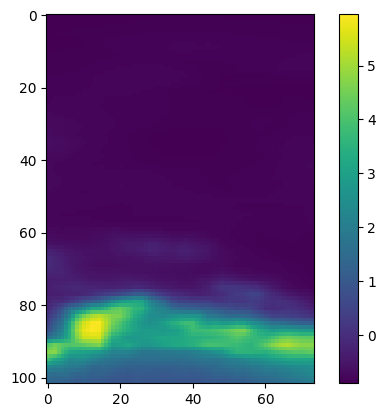

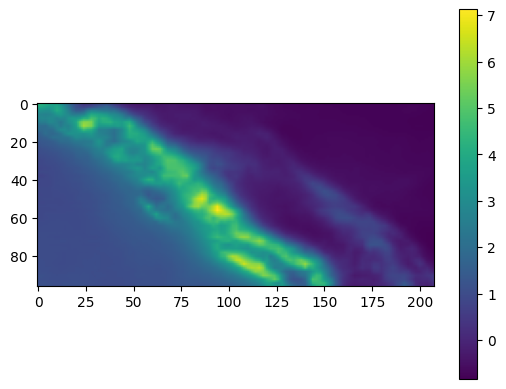

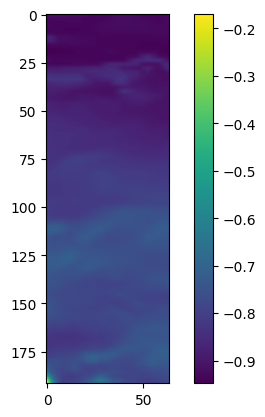

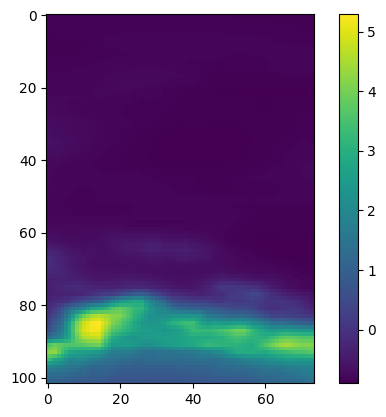

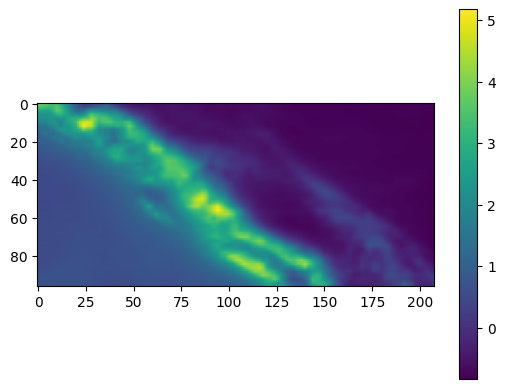

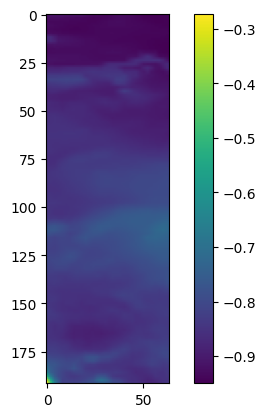

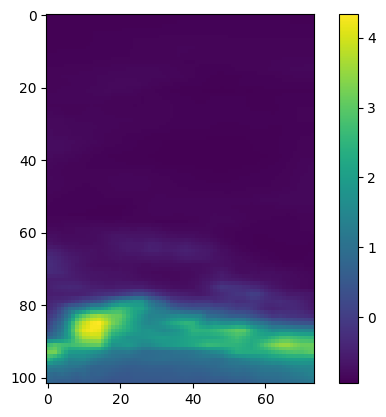

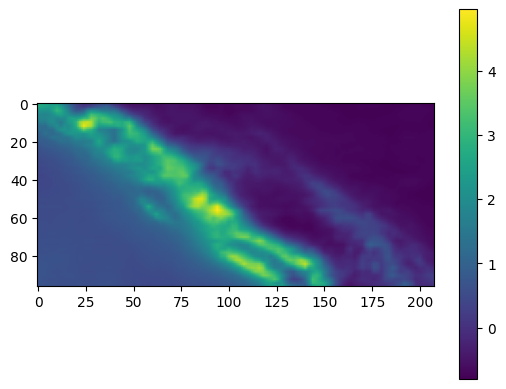

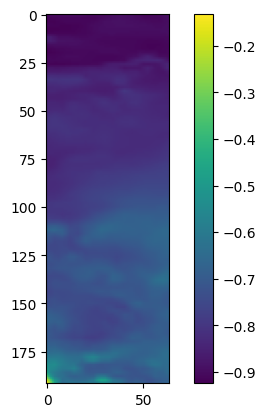

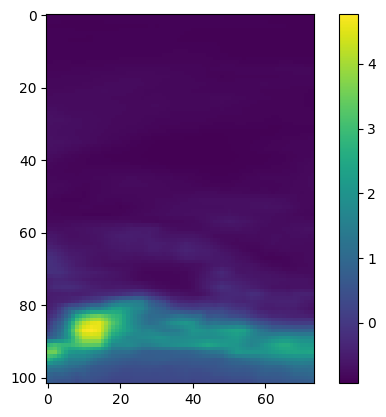

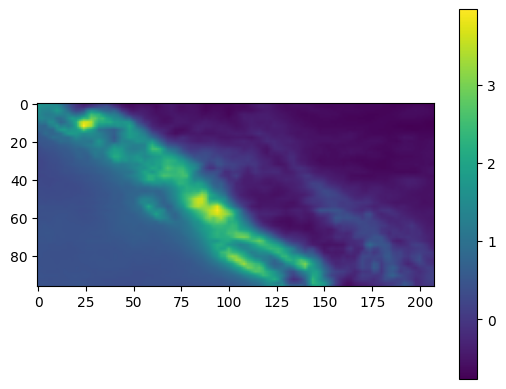

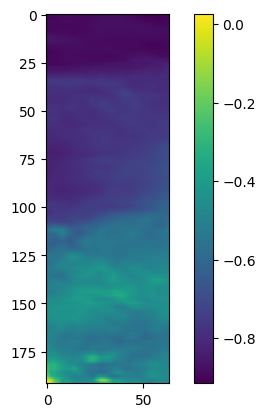

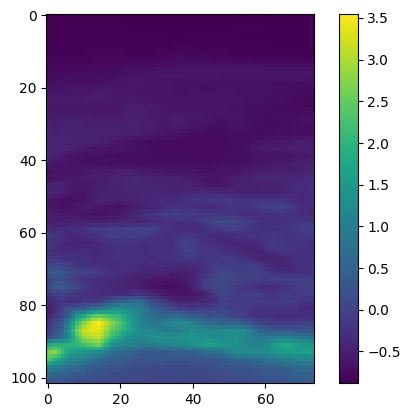

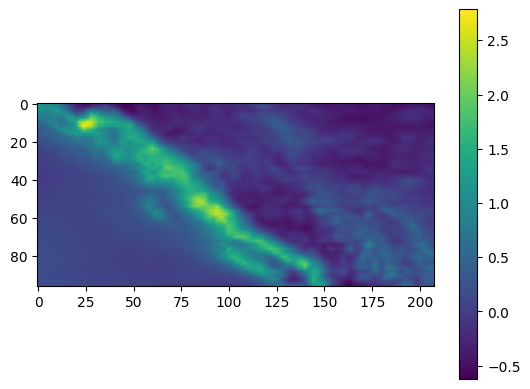

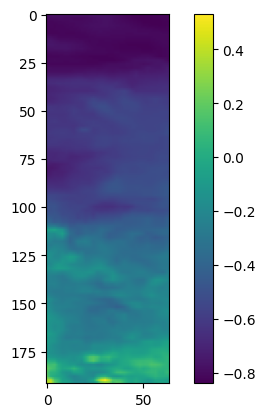

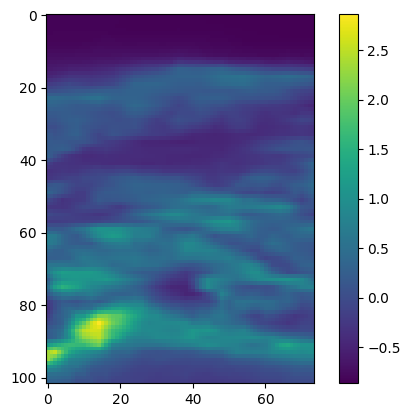

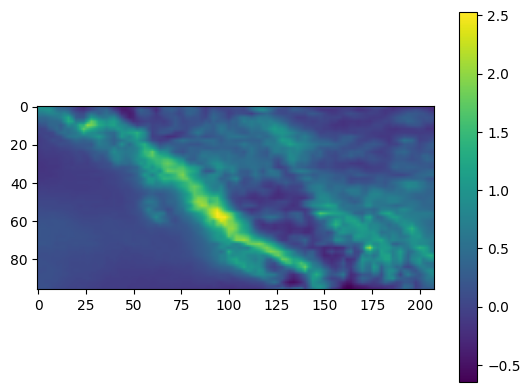

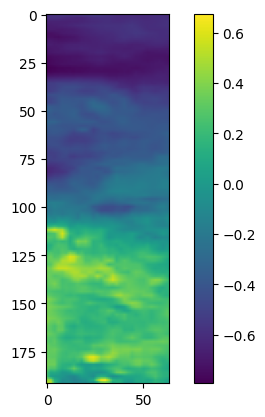

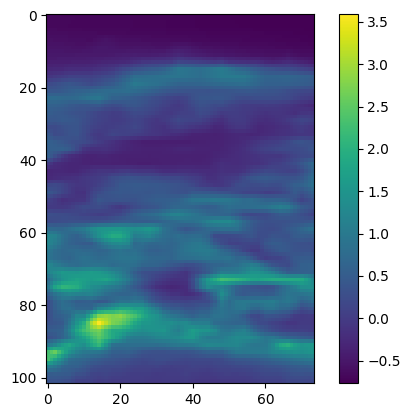

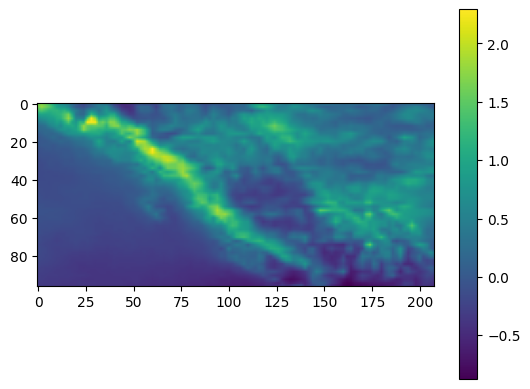

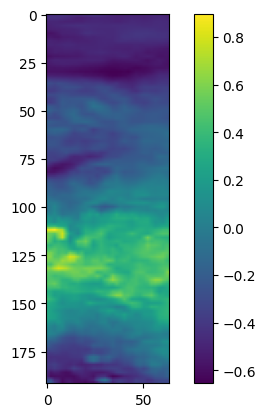

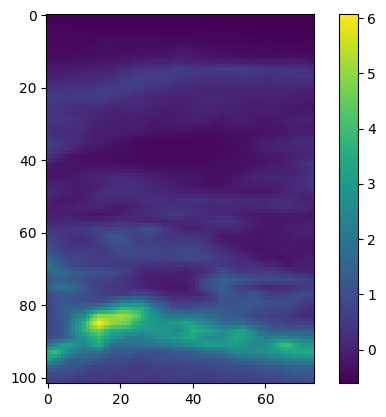

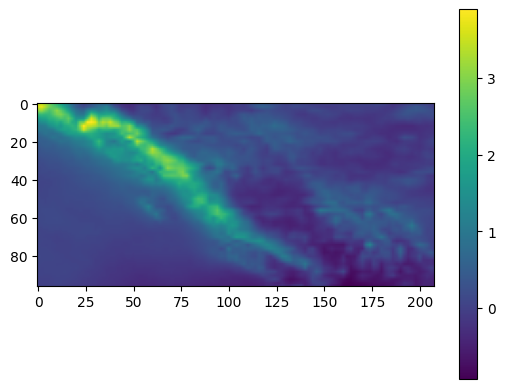

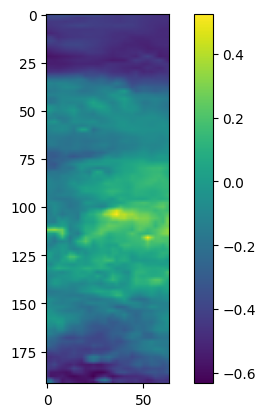

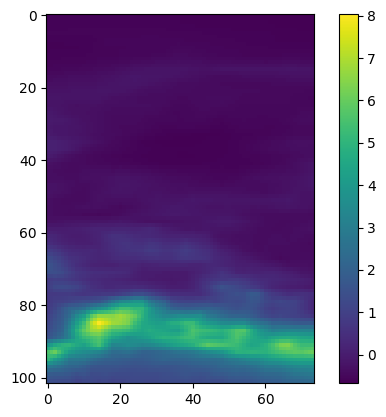

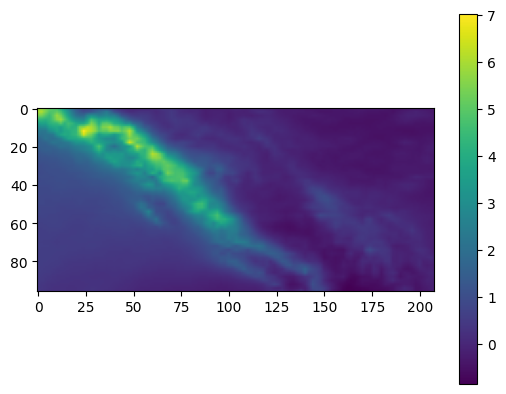

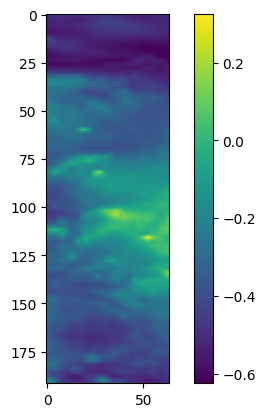

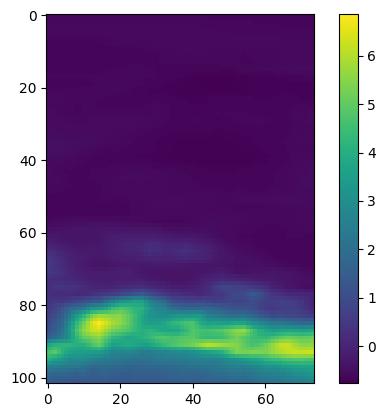

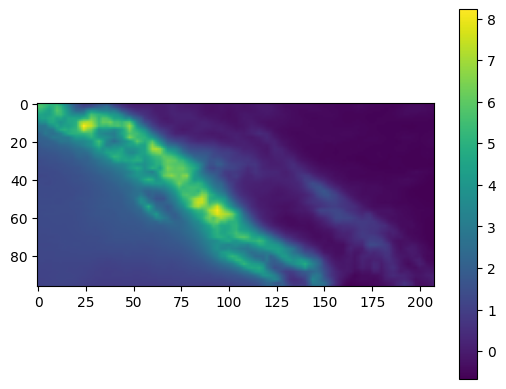

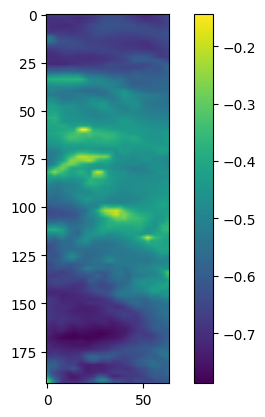

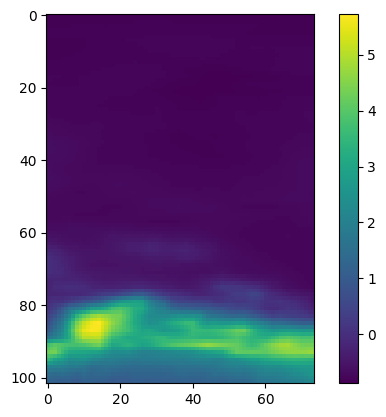

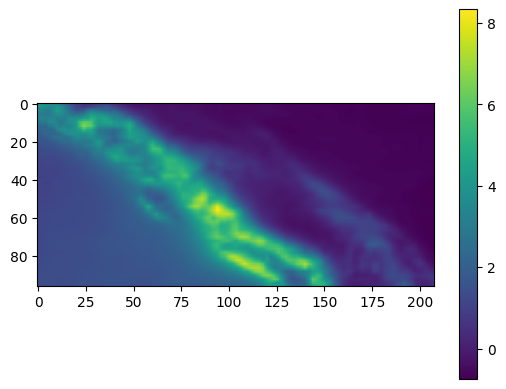

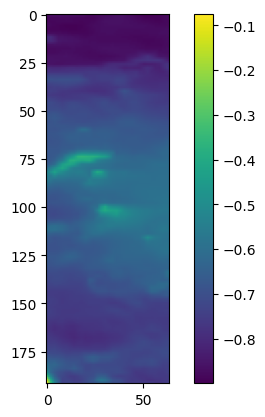

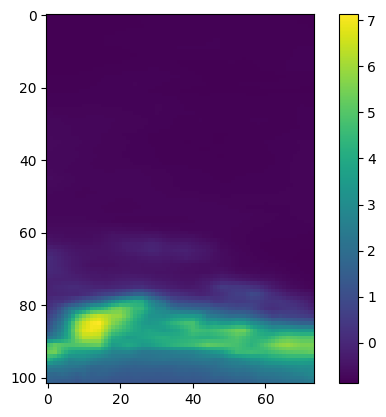

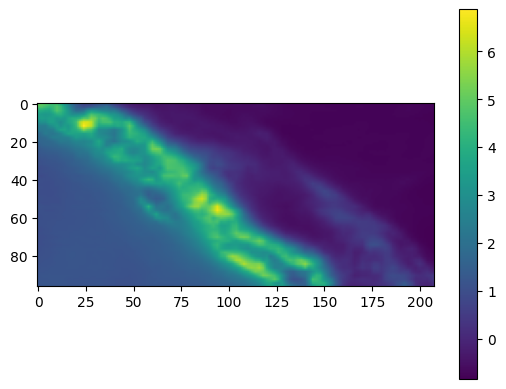

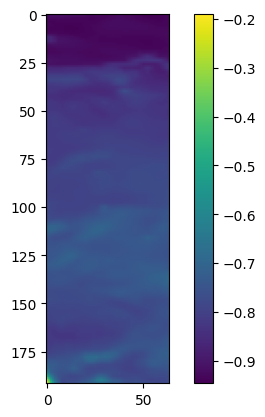

torch.Size([12, 102, 74])
torch.Size([12, 96, 208])
torch.Size([12, 192, 64])


In [39]:
## ------------- LOAD TRAINING DATA: ERA5 ------------ ##
# load in folders  
era5_folder = "/sapho/tirion/GANs/era5/prec/"
prism_folder = "/sapho/tirion/GANs/prism/prec/"
dem_folder = "/sapho/tirion/GANs/dem/"

## ERA5
# Alaska
era5_ak_fields = xr.open_dataset(era5_folder + "ppt_ak_train.nc")
era5_ak = torch.from_numpy(era5_ak_fields.to_array().to_numpy())[0,...]
era5_ak_log = np.log1p(era5_ak)
era5_stand_fields = xr.open_dataset(era5_folder + "ppt_13_5_full.nc")
era5_stand = torch.from_numpy(era5_stand_fields.to_array().to_numpy())[0,...]
era5_stand_log = np.log1p(era5_stand)

# standardize
mask = ~torch.isnan(era5_stand_log)
era5_mean = era5_stand_log[mask].mean()
era5_std = era5_stand_log[mask].std()
standardized_era5_ak = (era5_ak_log - era5_mean) / era5_std
standardized_era5_ak = standardized_era5_ak[:, :102, :74]

# BC
era5_bc_fields = xr.open_dataset(era5_folder + "ppt_bc_train.nc")
era5_bc = torch.from_numpy(era5_bc_fields.to_array().to_numpy())[0,...]
era5_bc_log = np.log1p(era5_bc)

# standardize
standardized_era5_bc = (era5_bc_log - era5_mean) / era5_std
standardized_era5_bc = standardized_era5_bc[:, :96, :208]

# Alberta
era5_ab_fields = xr.open_dataset(era5_folder + "ppt_ab_train.nc")
era5_ab = torch.from_numpy(era5_ab_fields.to_array().to_numpy())[0,...]
era5_ab_log = np.log1p(era5_ab)

# standardize
standardized_era5_ab = (era5_ab_log - era5_mean) / era5_std
standardized_era5_ab = standardized_era5_ab[:, :192, :64]

for i in range(12):
  plt.close()
  plt.imshow(standardized_era5_ak[i]) # by month
  plt.colorbar()
  plt.show()

  plt.close()
  plt.imshow(standardized_era5_bc[i]) # by month
  plt.colorbar()
  plt.show()

  plt.close()
  plt.imshow(standardized_era5_ab[i]) # by month
  plt.colorbar()
  plt.show()

print(standardized_era5_ak.shape)
print(standardized_era5_bc.shape)
print(standardized_era5_ab.shape)

/tmp/ipykernel_1017785/714289660.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_ak_log = np.log1p(prism_ak)
/tmp/ipykernel_1017785/714289660.py:19: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_bc_log = np.log1p(prism_bc)
/tmp/ipykernel_1017785/714289660.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_ab_log = np.log1p(prism_ab)


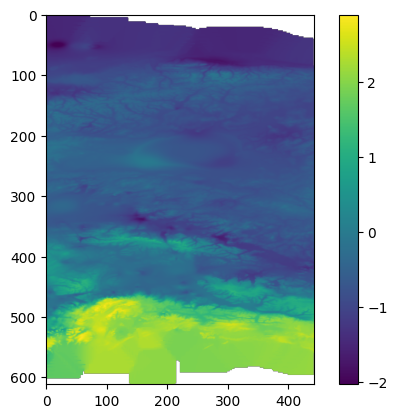

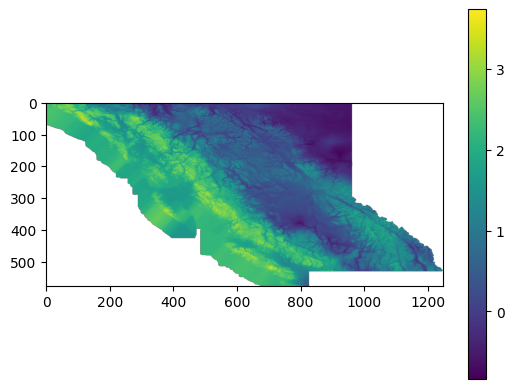

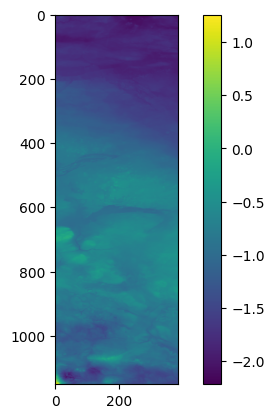

torch.Size([612, 444])
torch.Size([576, 1248])
torch.Size([1152, 384])


In [40]:
## ------------- LOAD TRAINING DATA: PRISM ------------ ##
## PRISM
# standardization
stand = pd.read_csv(prism_folder + "/standardization.csv")
prism_mean = stand["log_mean"][0]
prism_std = stand["log_sd"][0]

month = "dec"

# Alaska
prism_ak_fields = xr.open_dataset(prism_folder + month + "/prism_train_ak.nc")
prism_ak = torch.from_numpy(prism_ak_fields.to_array().to_numpy())[0,...]
prism_ak_log = np.log1p(prism_ak)
prism_ak_stand = (prism_ak_log - prism_mean) / prism_std

# BC
prism_bc_fields = xr.open_dataset(prism_folder + month + "/prism_train_bc.nc")
prism_bc = torch.from_numpy(prism_bc_fields.to_array().to_numpy())[0,...]
prism_bc_log = np.log1p(prism_bc)
prism_bc_stand = (prism_bc_log - prism_mean) / prism_std

# Alberta
prism_ab_fields = xr.open_dataset(prism_folder + month + "/prism_train_ab.nc")
prism_ab = torch.from_numpy(prism_ab_fields.to_array().to_numpy())[0,...]
prism_ab_log = np.log1p(prism_ab)
prism_ab_stand = (prism_ab_log - prism_mean) / prism_std

plt.close()
plt.imshow(prism_ak_stand)
plt.colorbar()
plt.show()

plt.close()
plt.imshow(prism_bc_stand)
plt.colorbar()
plt.show()

plt.close()
plt.imshow(prism_ab_stand)
plt.colorbar()
plt.show()

print(prism_ak_stand.shape)
print(prism_bc_stand.shape)
print(prism_ab_stand.shape)


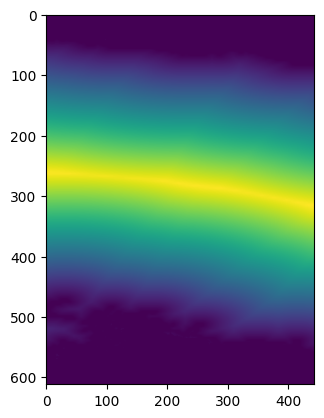

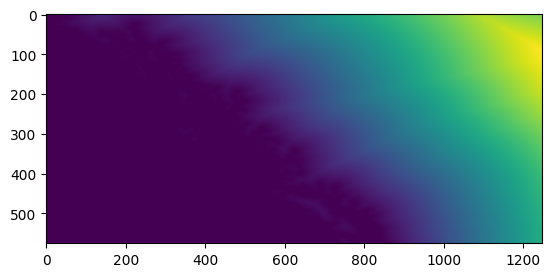

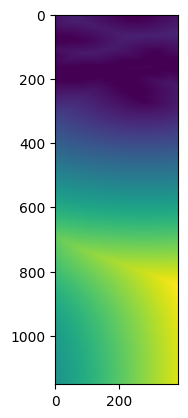

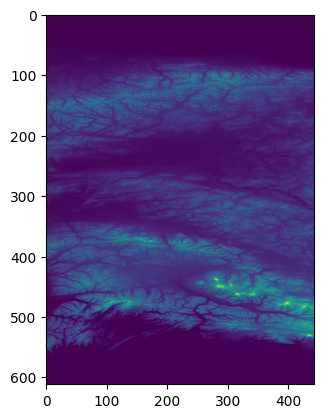

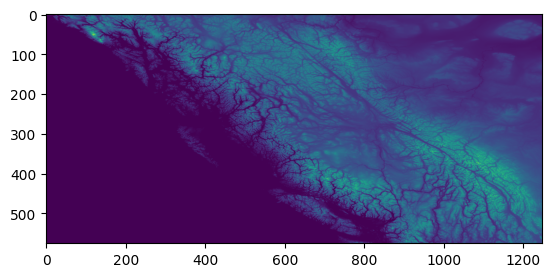

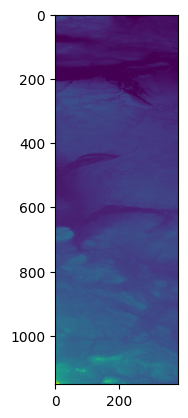

torch.Size([612, 444])
torch.Size([576, 1248])
torch.Size([1152, 384])
torch.Size([612, 444])
torch.Size([576, 1248])
torch.Size([1152, 384])


In [41]:
## ------------- LOAD TRAINING DATA: DEM & OCEAN PROXIMITY ------------ ##
## ocean proximity
# Alaska
op_ak_fields = xr.open_dataset(dem_folder + "op_ak.nc")
op_ak = torch.from_numpy(op_ak_fields.to_array().to_numpy())[0,...]
op_stand_fields = xr.open_dataset(dem_folder + "ocean_proximity_full.nc")
op_stand = torch.from_numpy(op_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(op_stand)
op_mean = op_stand[mask].mean()
op_std = op_stand[mask].std()
standardized_op_ak = (op_ak - op_mean) / op_std

plt.close()
plt.imshow(standardized_op_ak)
plt.show()

# BC
op_bc_fields = xr.open_dataset(dem_folder + "op_bc.nc")
op_bc = torch.from_numpy(op_bc_fields.to_array().to_numpy())[0,...]

# standardize
standardized_op_bc = (op_bc - op_mean) / op_std

plt.close()
plt.imshow(standardized_op_bc)
plt.show()

# Alberta 
op_ab_fields = xr.open_dataset(dem_folder + "op_ab.nc")
op_ab = torch.from_numpy(op_ab_fields.to_array().to_numpy())[0,...]

# standardize
standardized_op_ab = (op_ab - op_mean) / op_std

plt.close()
plt.imshow(standardized_op_ab)
plt.show()

## DEM
# Alaska
dem_ak_fields = xr.open_dataset(dem_folder + "dem_train_ak.nc")
dem_ak = torch.from_numpy(dem_ak_fields.to_array().to_numpy())[0,...]
dem_stand_fields = xr.open_dataset(dem_folder + "dem_full.nc")
dem_stand = torch.from_numpy(dem_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(dem_stand)
dem_mean = dem_stand[mask].mean()
dem_std = dem_stand[mask].std()
standardized_dem_ak = (dem_ak - dem_mean) / dem_std

plt.close()
plt.imshow(standardized_dem_ak)
plt.show()

# BC
dem_bc_fields = xr.open_dataset(dem_folder + "dem_train_bc.nc")
dem_bc = torch.from_numpy(dem_bc_fields.to_array().to_numpy())[0,...]

# standardize
standardized_dem_bc = (dem_bc - dem_mean) / dem_std

plt.close()
plt.imshow(standardized_dem_bc)
plt.show()

# Alberta
dem_ab_fields = xr.open_dataset(dem_folder + "dem_train_ab.nc")
dem_ab = torch.from_numpy(dem_ab_fields.to_array().to_numpy())[0,...]

# standardize
standardized_dem_ab = (dem_ab - dem_mean) / dem_std

plt.close()
plt.imshow(standardized_dem_ab)
plt.show()

print(standardized_op_ak.shape)
print(standardized_op_bc.shape)
print(standardized_op_ab.shape)

print(standardized_dem_ak.shape)
print(standardized_dem_bc.shape)
print(standardized_dem_ab.shape)

/tmp/ipykernel_1017785/1678333478.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_test_log = np.log1p(era5_test)
/tmp/ipykernel_1017785/1678333478.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_stand_log = np.log1p(era5_stand)
/tmp/ipykernel_1017785/1678333478.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_test_log = np.log1p(prism_test)


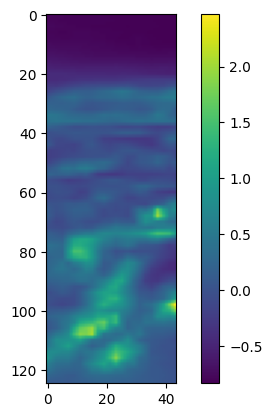

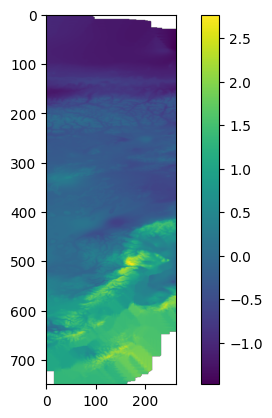

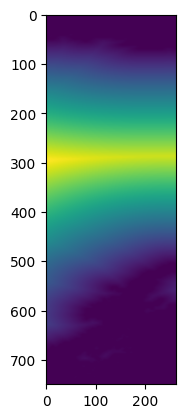

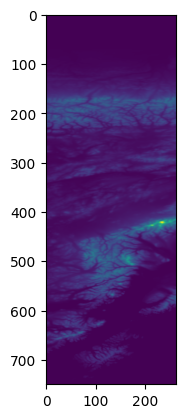

torch.Size([750, 264])
torch.Size([125, 44])
torch.Size([750, 264])
torch.Size([750, 264])


In [42]:
## ------------- LOAD TEST DATA ------------ ##
## ERA5
era5_test_fields = xr.open_dataset(era5_folder + "ppt_1981_2010_13_5_test.nc")
era5_test = torch.from_numpy(era5_test_fields.to_array().to_numpy())[0,...]
era5_test_log = np.log1p(era5_test)

# standardize
era5_stand_fields = xr.open_dataset(era5_folder + "ppt_13_5_full.nc")
era5_stand = torch.from_numpy(era5_stand_fields.to_array().to_numpy())[0,...]
era5_stand_log = np.log1p(era5_stand)
mask = ~torch.isnan(era5_stand_log)
era5_mean = era5_stand_log[mask].mean()
era5_std = era5_stand_log[mask].std()

standardized_era5_test = (era5_test_log - era5_mean) / era5_std
standardized_era5_test = standardized_era5_test[:,:,:44]

## PRISM
month = "dec"

# standardization
stand = pd.read_csv(prism_folder + "/standardization.csv")
prism_mean = stand["log_mean"][0]
prism_std = stand["log_sd"][0]

prism_fields = xr.open_dataset(prism_folder + month +"/prism_test_ext.nc")
prism_test = torch.from_numpy(prism_fields.to_array().to_numpy())[0,...]
prism_test_log = np.log1p(prism_test)
standardized_prism_test = (prism_test_log - prism_mean) / prism_std
standardized_prism_test = standardized_prism_test[:750,:]

plt.close()
plt.imshow(standardized_era5_test[5]) # by month
plt.colorbar()
plt.show()

plt.close()
plt.imshow(standardized_prism_test)
plt.colorbar()
plt.show()

## ocean proximity
op_test_fields = xr.open_dataset(dem_folder + "ocean_proximity_test.nc")
op_test = torch.from_numpy(op_test_fields.to_array().to_numpy())[0,...]
op_stand_fields = xr.open_dataset(dem_folder + "ocean_proximity_full.nc")
op_stand = torch.from_numpy(op_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(op_stand)
op_mean = op_stand[mask].mean()
op_std = op_stand[mask].std()
standardized_op_test = (op_test - op_mean) / op_std
standardized_op_test = standardized_op_test[:750,:]

plt.close()
plt.imshow(standardized_op_test)
plt.show()

## DEM
dem_test_fields = xr.open_dataset(dem_folder + "dem_test.nc")
dem_test = torch.from_numpy(dem_test_fields.to_array().to_numpy())[0,...]
dem_stand_fields = xr.open_dataset(dem_folder + "dem_full.nc")
dem_stand = torch.from_numpy(dem_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(dem_stand)
dem_mean = dem_stand[mask].mean()
dem_std = dem_stand[mask].std()
standardized_dem_test = (dem_test - dem_mean) / dem_std
standardized_dem_test = standardized_dem_test[:750,:]

plt.close()
plt.imshow(standardized_dem_test)
plt.show()

print(standardized_prism_test.shape)
print(standardized_era5_test[0].shape)
print(standardized_op_test.shape)
print(standardized_dem_test.shape)

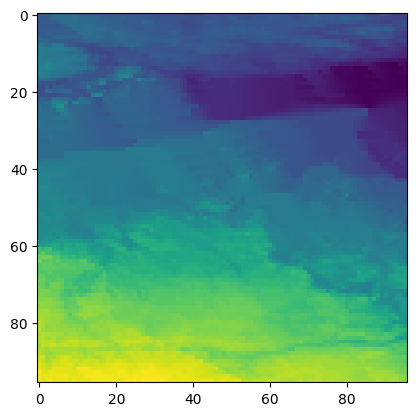

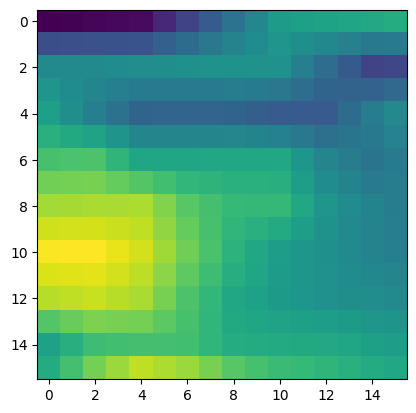

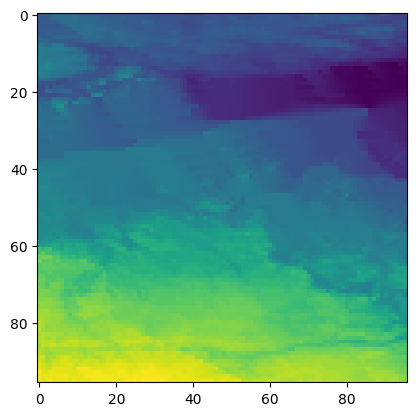

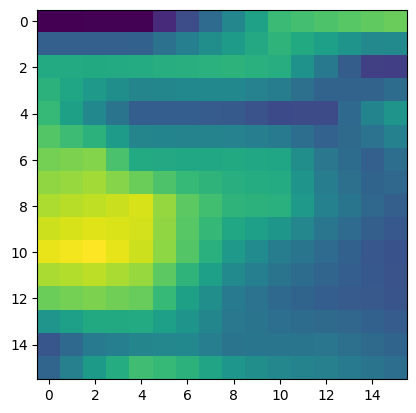

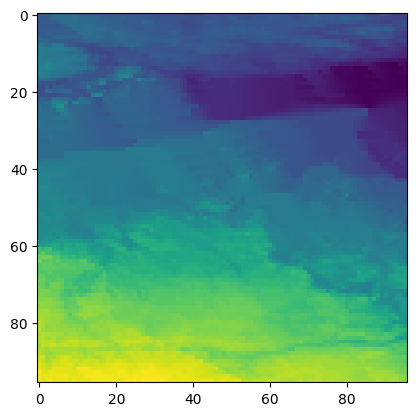

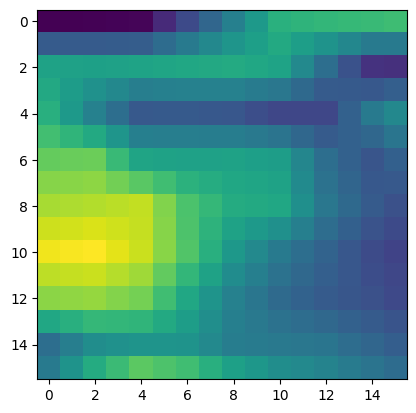

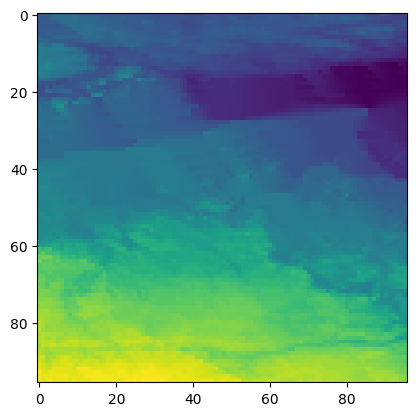

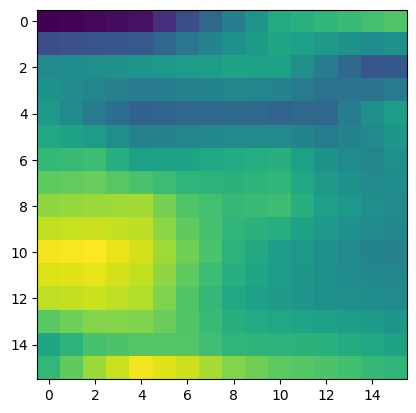

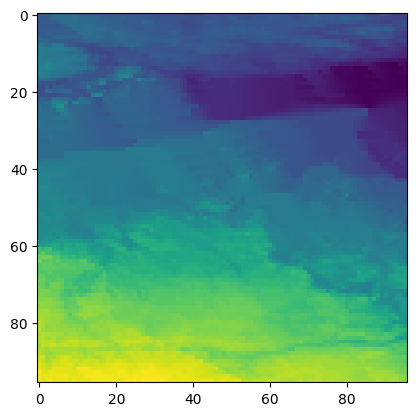

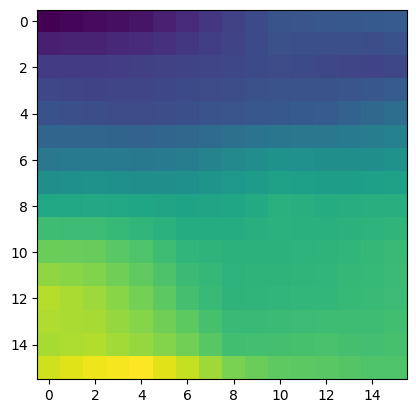

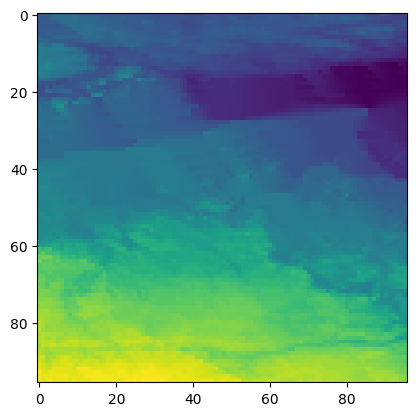

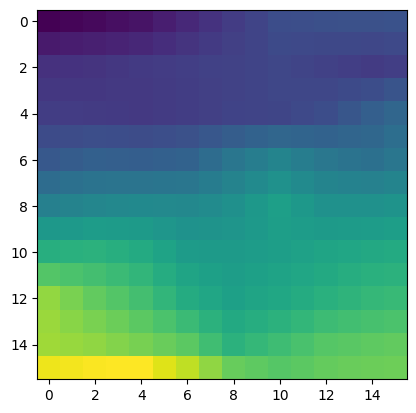

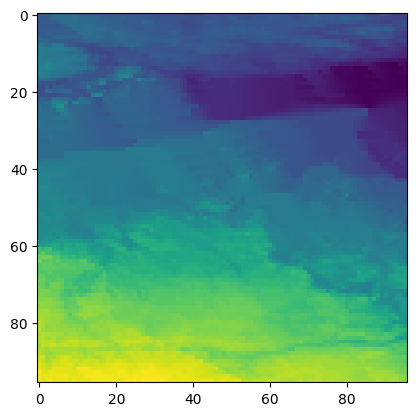

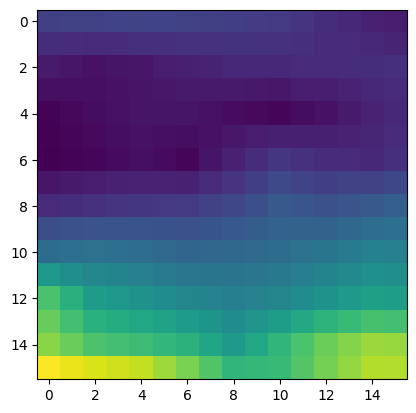

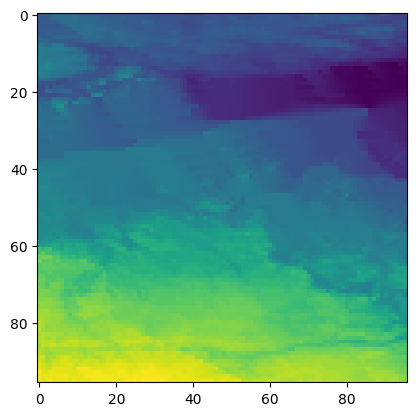

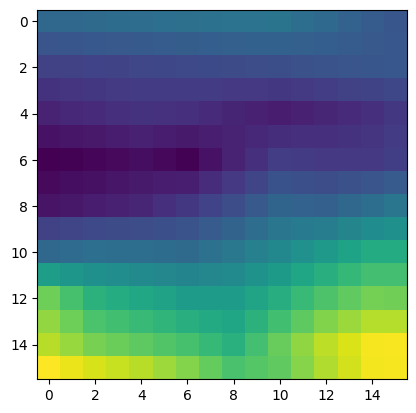

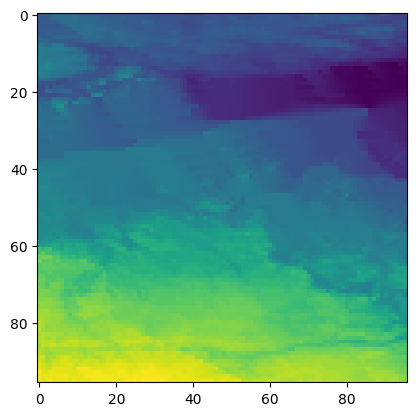

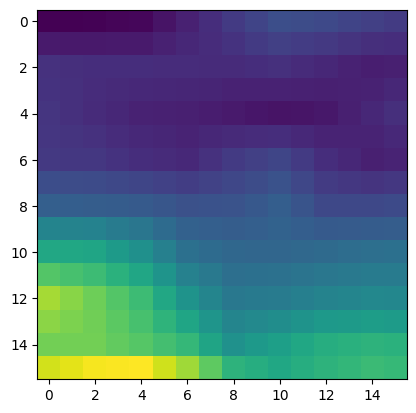

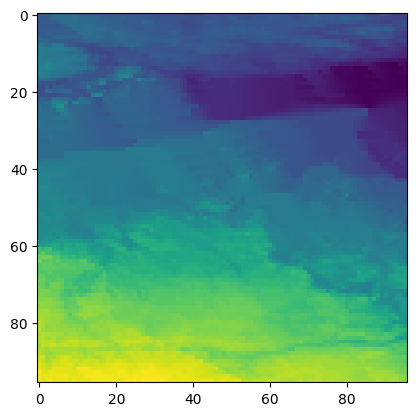

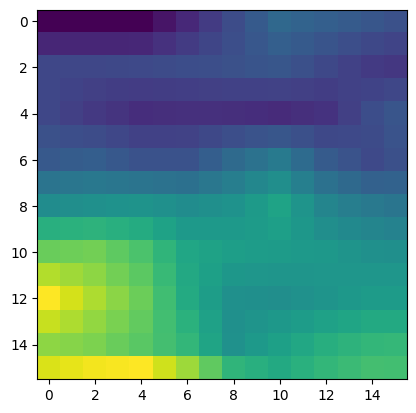

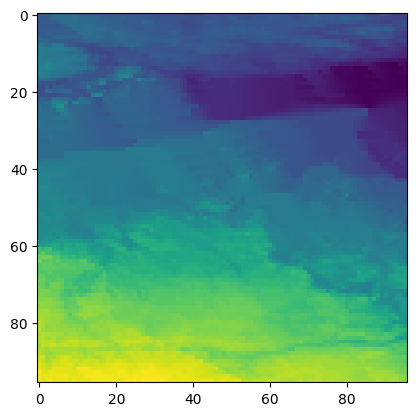

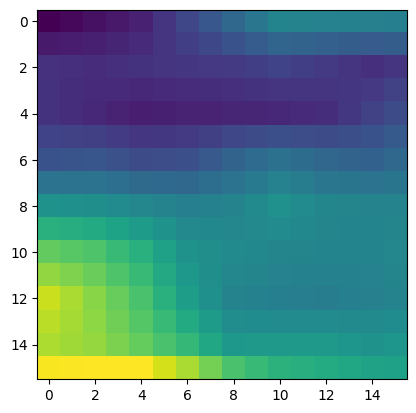

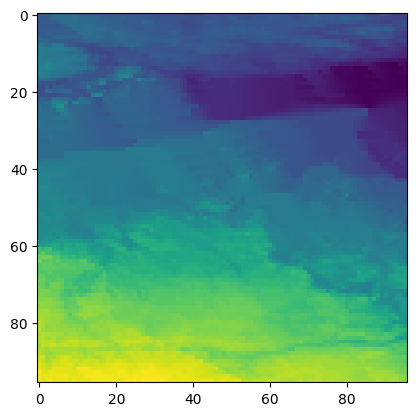

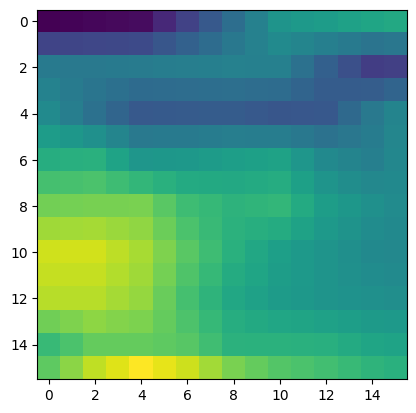

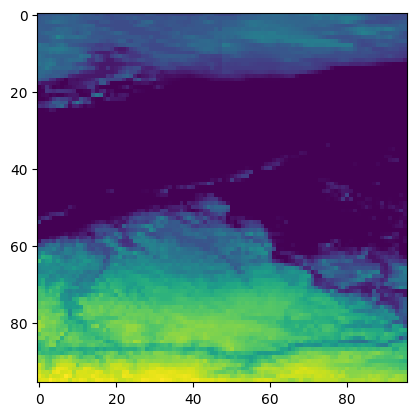

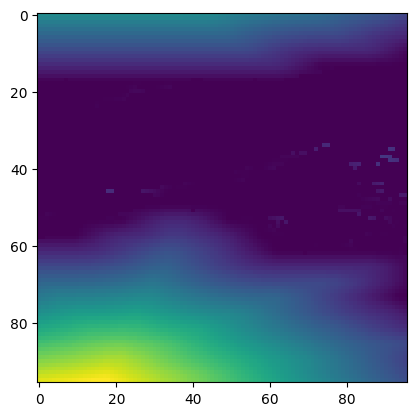

PRISM AK, BC, AB flat tiles shape:
torch.Size([1887, 96, 96])
torch.Size([19968, 96, 96])
torch.Size([3072, 96, 96])
ERA5 AK, BC, AB flat tiles shape:
torch.Size([1887, 12, 16, 16])
torch.Size([19968, 12, 16, 16])
torch.Size([3072, 12, 16, 16])
DEM AK, BC, AB flat tiles shape:
torch.Size([1887, 1, 96, 96])
torch.Size([19968, 1, 96, 96])
torch.Size([3072, 1, 96, 96])
OCEAN PROXIMITY AK, BC, AB flat tiles shape:
torch.Size([1887, 1, 96, 96])
torch.Size([19968, 1, 96, 96])
torch.Size([3072, 1, 96, 96])
HRCOV AK, BC, AB flat tiles shape:
torch.Size([1887, 2, 96, 96])
torch.Size([19968, 2, 96, 96])
torch.Size([3072, 2, 96, 96])
PRISM, ERA5, DEM/OP test flat tiles shape:
torch.Size([1386, 96, 96])
torch.Size([1386, 12, 16, 16])
torch.Size([1386, 2, 96, 96])
CLEAN test shape:
torch.Size([755, 96, 96])
torch.Size([755, 12, 16, 16])
torch.Size([755, 2, 96, 96])


In [43]:
## ------------- MAKE TILES ------------ ##
def tile_data(tensor, tile_size, offset):
  h, w = tensor.size(1), tensor.size(2)
  res_ls = []
  for y in range(int(math.ceil(h/offset))):
    for x in range(int(math.ceil(w/offset))):
      curr = tensor[:, offset*y:min(offset*y+tile_size, h), offset*x:min(offset*x+tile_size, w)]
      if(y == 0):
        res_ls.append([curr])
      else:
        res_ls[x].append(curr)
  res_pad = [[torch.nn.functional.pad(ten, (0,tile_size-ten.shape[2],0,tile_size - ten.shape[1],0,0), mode = "constant", value = 0) for ten in x] for x in res_ls]
  return(res_pad)

def remove_tiles(prism, era5, dem):
  assert prism.size(0) == era5.size(0) == dem.size(0), "Tensors must be same size"
  prism_nan = torch.isnan(prism).view(prism.size(0), -1).any(dim=1)
  era5_nan  = torch.isnan(era5).view(era5.size(0), -1).any(dim=1)
  dem_nan   = torch.isnan(dem).view(dem.size(0), -1).any(dim=1)
  bad_tiles = prism_nan | era5_nan | dem_nan
  clean_prism = prism[~bad_tiles]
  clean_era5 = era5[~bad_tiles]
  clean_dem = dem[~bad_tiles]
  return clean_prism, clean_era5, clean_dem

def remove_zero_tiles(prism, era5, dem):
  assert prism.size(0) == era5.size(0) == dem.size(0), "Tensors must be same size"
  zero_mask = (prism == 0).view(prism.size(0), -1).any(dim=1)
  clean_prism = prism[~zero_mask]
  clean_era5 = era5[~zero_mask]
  clean_dem = dem[~zero_mask]
  return clean_prism, clean_era5, clean_dem


def trim_tiles(tiles, batch_size):
  num_tiles = tiles.shape[0]
  remainder = num_tiles % batch_size
  
  if remainder != 0:
      tiles = tiles[:-remainder]
  
  return tiles

scale_factor = 6
tile_size = 96
offset = 12
offset_bc = 6

## PRISM
# Alaska, BC, Alberta tiled separately
prism_ak_tiles = tile_data(prism_ak_stand.unsqueeze(0), tile_size, offset)
prism_bc_tiles = tile_data(prism_bc_stand.unsqueeze(0), tile_size, offset_bc)
prism_ab_tiles = tile_data(prism_ab_stand.unsqueeze(0), tile_size, offset)
#prism_tiles = prism_ak_tiles + prism_bc_tiles + prism_ab_tiles

prism_test_tiles = tile_data(standardized_prism_test.unsqueeze(0), tile_size, offset)

## ERA5
seqs = []
for i in range(12):
  seq = [i] + [x for x in range(12) if x != i]
  seqs.append(seq)

era5_ak_tiles = tile_data(standardized_era5_ak[seqs[11],...], int(tile_size / scale_factor), int(offset / scale_factor))
era5_bc_tiles = tile_data(standardized_era5_bc[seqs[11],...], int(tile_size / scale_factor), int(offset_bc / scale_factor))
era5_ab_tiles = tile_data(standardized_era5_ab[seqs[11],...], int(tile_size / scale_factor), int(offset / scale_factor))
#era5_tiles = era5_ak_tiles + era5_bc_tiles + era5_ab_tiles

for i in range(12):
  plt.close()
  plt.imshow(prism_ab_tiles[8][12][0,...])
  plt.show()

  plt.close()
  plt.imshow(era5_ab_tiles[18][12][i,...])
  plt.show()

era5_test_tiles = tile_data(standardized_era5_test[seqs[11],...], int(tile_size / scale_factor), int(offset / scale_factor))

## DEM & ocean proximity
dem_ak_tiles = tile_data(standardized_dem_ak.unsqueeze(0), tile_size, offset)
dem_bc_tiles = tile_data(standardized_dem_bc.unsqueeze(0), tile_size, offset_bc)
dem_ab_tiles = tile_data(standardized_dem_ab.unsqueeze(0), tile_size, offset)
#dem_tiles = dem_ak_tiles + dem_bc_tiles + dem_ab_tiles

op_ak_tiles = tile_data(standardized_op_ak.unsqueeze(0), tile_size, offset)
op_bc_tiles = tile_data(standardized_op_bc.unsqueeze(0), tile_size, offset_bc)
op_ab_tiles = tile_data(standardized_op_ab.unsqueeze(0), tile_size, offset)
#op_tiles = op_ak_tiles + op_bc_tiles + op_ab_tiles

plt.close()
plt.imshow(dem_ab_tiles[8][12][0,...])
plt.show()

plt.close()
plt.imshow(op_ab_tiles[8][12][0,...])
plt.show()

hrcov_test = torch.cat([standardized_dem_test.unsqueeze(0), standardized_op_test.unsqueeze(0)], dim = 0)
hrcov_test_tiles = tile_data(hrcov_test, tile_size, offset)

prism_ak_tiles_flat = torch.cat([tile for row in prism_ak_tiles for tile in row], dim=0)
prism_bc_tiles_flat = torch.cat([tile for row in prism_bc_tiles for tile in row], dim=0)
prism_ab_tiles_flat = torch.cat([tile for row in prism_ab_tiles for tile in row], dim=0)
print("PRISM AK, BC, AB flat tiles shape:")
print(prism_ak_tiles_flat.shape)
print(prism_bc_tiles_flat.shape)
print(prism_ab_tiles_flat.shape)

era5_ak_tiles_flat = torch.cat([tile.unsqueeze(0) for row in era5_ak_tiles for tile in row], dim=0)
era5_bc_tiles_flat = torch.cat([tile.unsqueeze(0) for row in era5_bc_tiles for tile in row], dim=0)
era5_ab_tiles_flat = torch.cat([tile.unsqueeze(0) for row in era5_ab_tiles for tile in row], dim=0)
print("ERA5 AK, BC, AB flat tiles shape:")
print(era5_ak_tiles_flat.shape)
print(era5_bc_tiles_flat.shape)
print(era5_ab_tiles_flat.shape)

dem_ak_tiles_flat = torch.cat([tile.unsqueeze(0) for row in dem_ak_tiles for tile in row], dim=0)
dem_bc_tiles_flat = torch.cat([tile.unsqueeze(0) for row in dem_bc_tiles for tile in row], dim=0)
dem_ab_tiles_flat = torch.cat([tile.unsqueeze(0) for row in dem_ab_tiles for tile in row], dim=0)
print("DEM AK, BC, AB flat tiles shape:")
print(dem_ak_tiles_flat.shape)
print(dem_bc_tiles_flat.shape)
print(dem_ab_tiles_flat.shape)

op_ak_tiles_flat = torch.cat([tile.unsqueeze(0) for row in op_ak_tiles for tile in row], dim=0)
op_bc_tiles_flat = torch.cat([tile.unsqueeze(0) for row in op_bc_tiles for tile in row], dim=0)
op_ab_tiles_flat = torch.cat([tile.unsqueeze(0) for row in op_ab_tiles for tile in row], dim=0)
print("OCEAN PROXIMITY AK, BC, AB flat tiles shape:")
print(op_ak_tiles_flat.shape)
print(op_bc_tiles_flat.shape)
print(op_ab_tiles_flat.shape)

hrcov_ak_tiles_flat = torch.cat([dem_ak_tiles_flat, op_ak_tiles_flat], dim=1)
print("HRCOV AK, BC, AB flat tiles shape:")
print(hrcov_ak_tiles_flat.shape)

hrcov_bc_tiles_flat = torch.cat([dem_bc_tiles_flat, op_bc_tiles_flat], dim=1)
print(hrcov_bc_tiles_flat.shape)

hrcov_ab_tiles_flat = torch.cat([dem_ab_tiles_flat, op_ab_tiles_flat], dim=1)
print(hrcov_ab_tiles_flat.shape)

prism_tiles_flat_test = torch.cat([tile for row in prism_test_tiles for tile in row], dim=0)
era5_tiles_flat_test = torch.cat([tile.unsqueeze(0) for row in era5_test_tiles for tile in row], dim=0)
dem_tiles_flat_test = torch.cat([tile.unsqueeze(0) for row in hrcov_test_tiles for tile in row], dim=0)

print("PRISM, ERA5, DEM/OP test flat tiles shape:")
print(prism_tiles_flat_test.shape)
print(era5_tiles_flat_test.shape)
print(dem_tiles_flat_test.shape)

# remove any tiles with missing values for training
clean_prism_ak, clean_era5_ak, clean_dem_ak = remove_tiles(prism_ak_tiles_flat, era5_ak_tiles_flat, hrcov_ak_tiles_flat)
clean_prism_bc, clean_era5_bc, clean_dem_bc = remove_tiles(prism_bc_tiles_flat, era5_bc_tiles_flat, hrcov_bc_tiles_flat)
clean_prism_ab, clean_era5_ab, clean_dem_ab = remove_tiles(prism_ab_tiles_flat, era5_ab_tiles_flat, hrcov_ab_tiles_flat)

# make sure number of tiles is a multiple of batch size = 20
clean_prism_ak = trim_tiles(clean_prism_ak, 20)
clean_era5_ak = trim_tiles(clean_era5_ak, 20)
clean_dem_ak = trim_tiles(clean_dem_ak, 20)

clean_prism_bc = trim_tiles(clean_prism_bc, 20)
clean_era5_bc = trim_tiles(clean_era5_bc, 20)
clean_dem_bc = trim_tiles(clean_dem_bc, 20)

clean_prism_ab = trim_tiles(clean_prism_ab, 20)
clean_era5_ab = trim_tiles(clean_era5_ab, 20)
clean_dem_ab = trim_tiles(clean_dem_ab, 20)

# remove any tiles with missing values for testing
clean_prism_test, clean_era5_test, clean_dem_test = remove_tiles(prism_tiles_flat_test, era5_tiles_flat_test, dem_tiles_flat_test)

# remove any tiles that have any values=0 for testing
clean_prism_test, clean_era5_test, clean_dem_test = remove_zero_tiles(clean_prism_test, clean_era5_test, clean_dem_test)

print("CLEAN test shape:")
print(clean_prism_test.shape)
print(clean_era5_test.shape)
print(clean_dem_test.shape)

data_folder = "/sapho/tirion/climgan/data/prec/foundational_model/model4/dec/"

torch.save(clean_prism_ak, data_folder + "prism_ak_tiles.pt")
torch.save(clean_prism_bc, data_folder + "prism_bc_tiles.pt")
torch.save(clean_prism_ab, data_folder + "prism_ab_tiles.pt")
torch.save(clean_era5_ak, data_folder + "era5_ak_tiles.pt")
torch.save(clean_era5_bc, data_folder + "era5_bc_tiles.pt")
torch.save(clean_era5_ab, data_folder + "era5_ab_tiles.pt")
torch.save(clean_dem_ak, data_folder + "dem_ak_tiles.pt")
torch.save(clean_dem_bc, data_folder + "dem_bc_tiles.pt")
torch.save(clean_dem_ab, data_folder + "dem_ab_tiles.pt")

torch.save(clean_prism_test, data_folder + "prism_test_tiles.pt")
torch.save(clean_era5_test, data_folder + "era5_test_tiles.pt")
torch.save(clean_dem_test, data_folder + "dem_test_tiles.pt")

In [44]:
## ------------- FINAL CLEAN ------------ ##
# had to split this up due to memory overloading
data_folder = "/sapho/tirion/climgan/data/prec/foundational_model/model4/dec/"

clean_prism_ak = torch.load(data_folder + "prism_ak_tiles.pt")
clean_prism_bc = torch.load(data_folder + "prism_bc_tiles.pt")
clean_prism_ab = torch.load(data_folder + "prism_ab_tiles.pt")
clean_era5_ak = torch.load(data_folder + "era5_ak_tiles.pt")
clean_era5_bc = torch.load(data_folder + "era5_bc_tiles.pt")
clean_era5_ab = torch.load(data_folder + "era5_ab_tiles.pt")
clean_dem_ak = torch.load(data_folder + "dem_ak_tiles.pt")
clean_dem_bc = torch.load(data_folder + "dem_bc_tiles.pt")
clean_dem_ab = torch.load(data_folder + "dem_ab_tiles.pt")

clean_prism = torch.cat([clean_prism_ak, clean_prism_bc, clean_prism_ab], dim=0)
clean_era5 = torch.cat([clean_era5_ak, clean_era5_bc, clean_era5_ab], dim=0)
clean_dem = torch.cat([clean_dem_ak, clean_dem_bc, clean_dem_ab], dim=0)

# check shapes
print("CLEAN train shape:")
print(clean_prism.shape)
print(clean_era5.shape)
print(clean_dem.shape)

torch.save(clean_prism, data_folder + "prism_tiles.pt")
torch.save(clean_era5, data_folder + "era5_tiles.pt")
torch.save(clean_dem, data_folder + "dem_tiles.pt")

CLEAN train shape:
torch.Size([11600, 96, 96])
torch.Size([11600, 12, 16, 16])
torch.Size([11600, 2, 96, 96])


torch.Size([12, 16, 16])


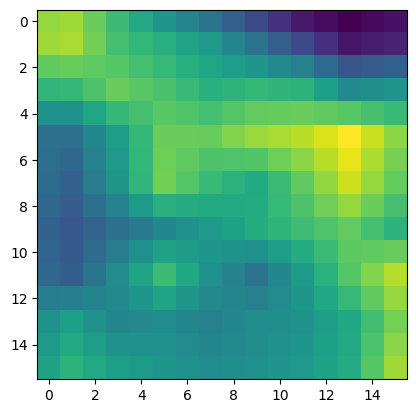

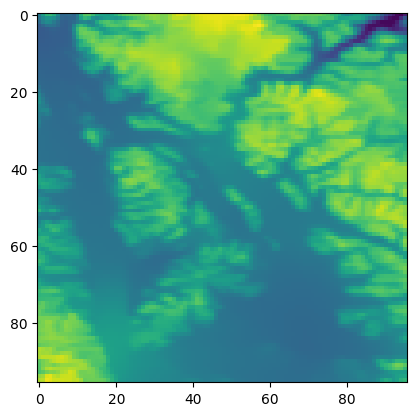

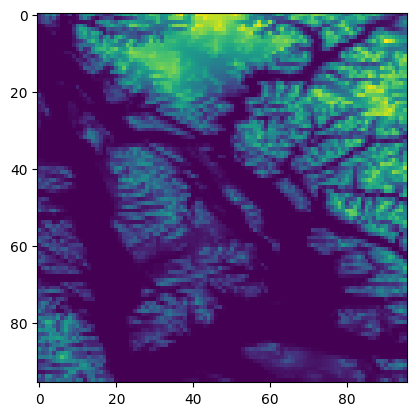

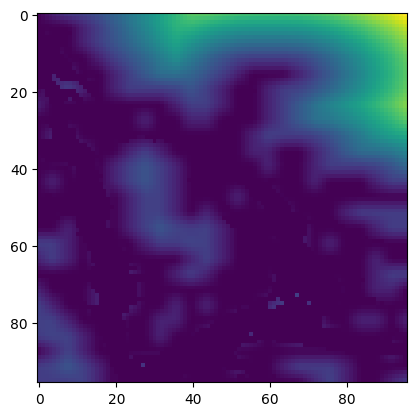

In [19]:
era5 = clean_era5[1449]
print(era5.shape)

prism = clean_prism[1449]

dem = clean_dem[1449]

# for num in range(12):
#     plt.close()
#     plt.imshow(era5[num])
#     plt.show()

plt.close()
plt.imshow(era5[0])
plt.show()

plt.close()
plt.imshow(prism)
plt.show()

plt.close()
plt.imshow(dem[0])
plt.show()

plt.close()
plt.imshow(dem[1])
plt.show()

# PREDICTING CODE

/tmp/ipykernel_1205835/2380890992.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_log = np.log1p(era5)
/tmp/ipykernel_1205835/2380890992.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_stand_log = np.log1p(era5_stand)
/tmp/ipykernel_1205835/2380890992.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_log = np.log1p(prism)


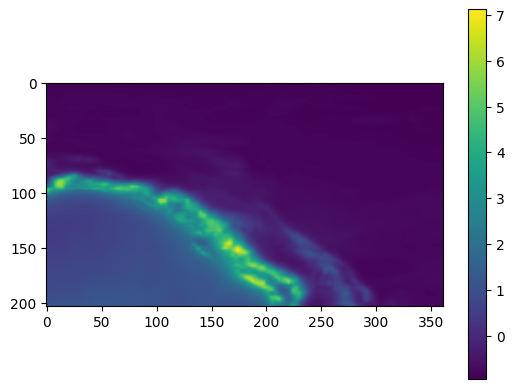

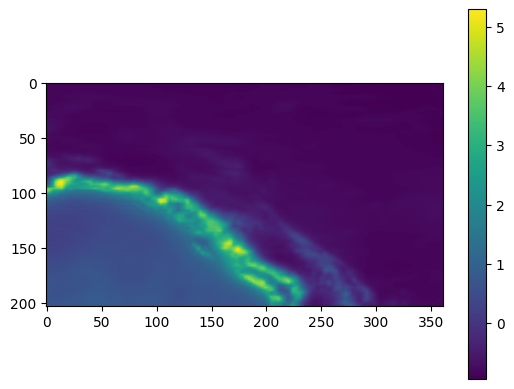

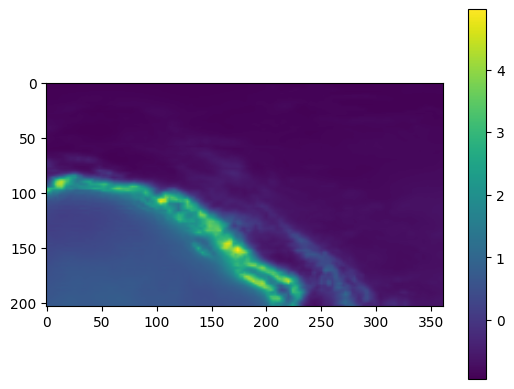

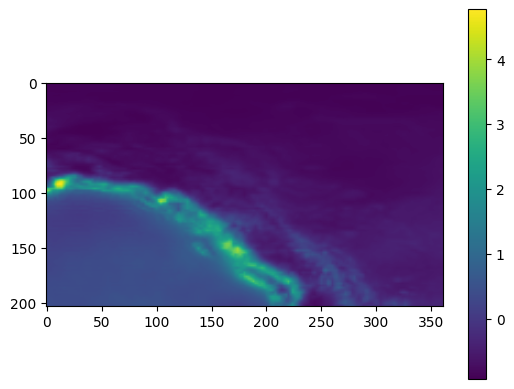

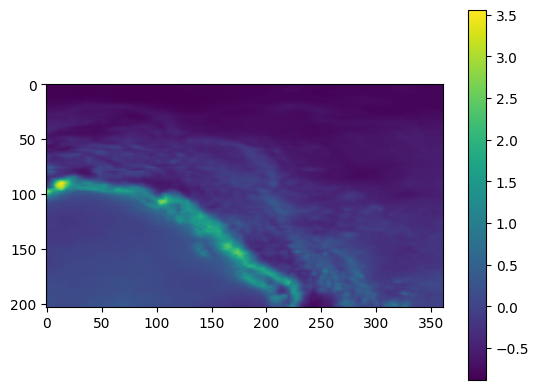

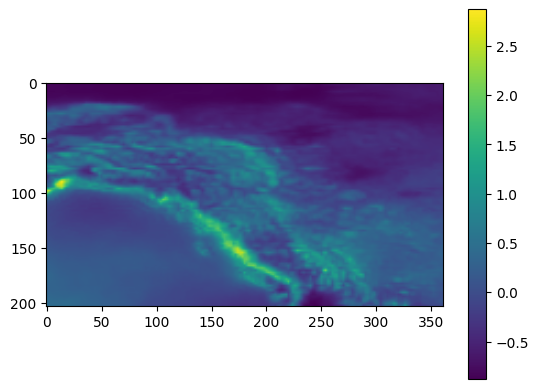

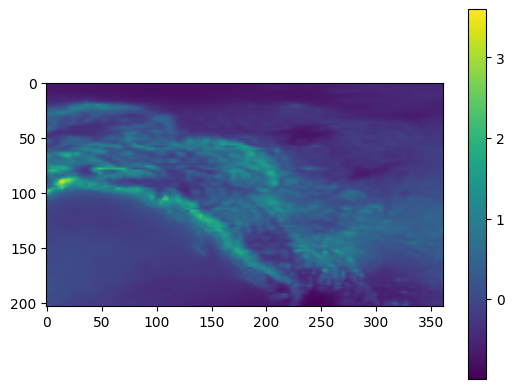

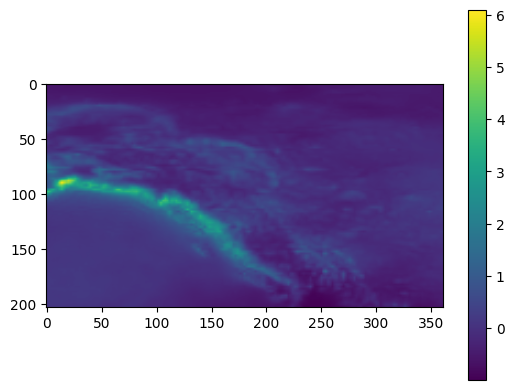

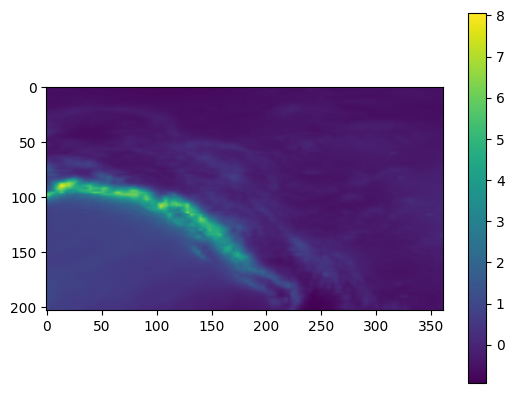

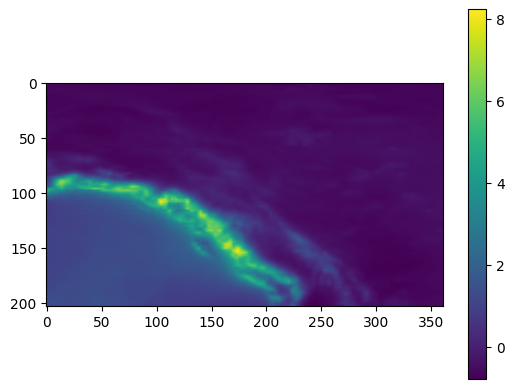

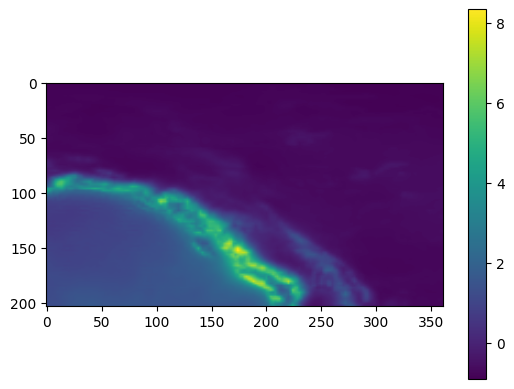

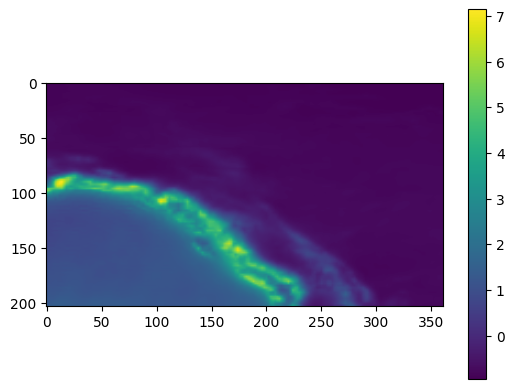

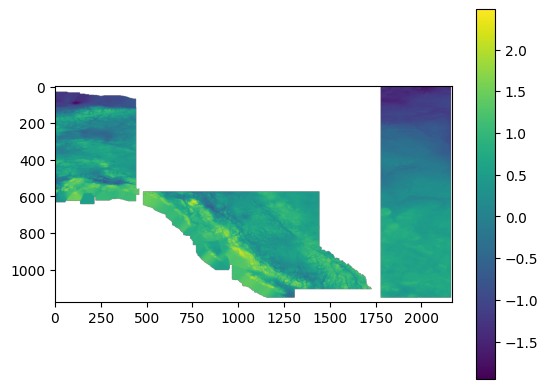

torch.Size([12, 203, 361])
torch.Size([1176, 2165])
torch.Size([1224, 2168])


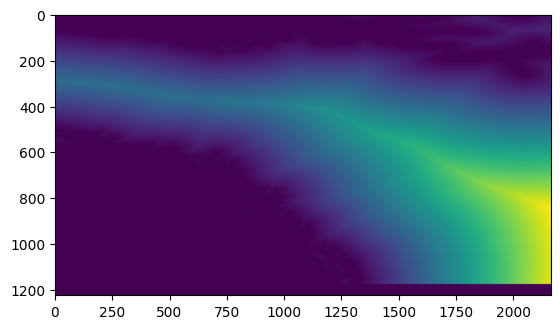

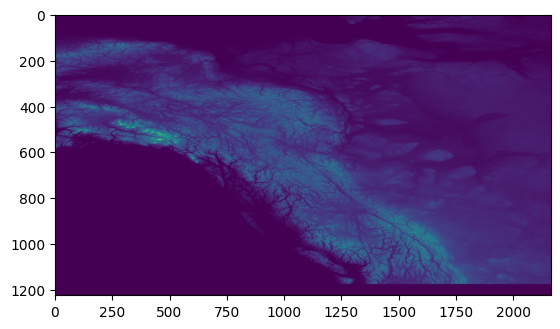

torch.Size([1224, 2165])
torch.Size([1224, 2165])


In [328]:
## ------------- LOAD TRAINING DATA ------------ ##
# load in folders  
era5_folder = "/sapho/tirion/GANs/era5/prec/"
prism_folder = "/sapho/tirion/GANs/prism/prec/"
dem_folder = "/sapho/tirion/GANs/dem/"

## ERA5
era5_fields = xr.open_dataset(era5_folder + "ppt_1981_2010_13_5_pred.nc")
era5 = torch.from_numpy(era5_fields.to_array().to_numpy())[0,...]
era5_log = np.log1p(era5)
era5_stand_fields = xr.open_dataset(era5_folder + "ppt_13_5_full.nc")
era5_stand = torch.from_numpy(era5_stand_fields.to_array().to_numpy())[0,...]
era5_stand_log = np.log1p(era5_stand)

# standardize
mask = ~torch.isnan(era5_stand_log)
era5_mean = era5_stand_log[mask].mean()
era5_std = era5_stand_log[mask].std()
standardized_era5 = (era5_log - era5_mean) / era5_std

## PRISM
month = "jun"

# standardization
stand = pd.read_csv(prism_folder + "/standardization.csv")
prism_mean = stand["log_mean"][0]
prism_std = stand["log_sd"][0]

prism_fields = xr.open_dataset(prism_folder + month +"/prism_train_coarse_ext.nc")
prism = torch.from_numpy(prism_fields.to_array().to_numpy())[0,...]
prism_log = np.log1p(prism)
prism_stand = (prism_log - prism_mean) / prism_std

for i in range(12):
  plt.close()
  plt.imshow(standardized_era5[i]) # by month
  plt.colorbar()
  plt.show()

plt.close()
plt.imshow(prism_stand)
plt.colorbar()
plt.show()

print(standardized_era5.shape)
print(prism_stand.shape)

## ocean proximity
op_fields = xr.open_dataset(dem_folder + "ocean_proximity_pred.nc")
op = torch.from_numpy(op_fields.to_array().to_numpy())[0,...]
op_stand_fields = xr.open_dataset(dem_folder + "ocean_proximity_full.nc")
op_stand = torch.from_numpy(op_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(op_stand)
op_mean = op_stand[mask].mean()
op_std = op_stand[mask].std()
standardized_op = (op - op_mean) / op_std
print(standardized_op.shape)
standardized_op = standardized_op[:, :2165]

plt.close()
plt.imshow(standardized_op)
plt.show()

## DEM
dem_fields = xr.open_dataset(dem_folder + "dem_pred.nc")
dem = torch.from_numpy(dem_fields.to_array().to_numpy())[0,...]
dem_stand_fields = xr.open_dataset(dem_folder + "dem_full.nc")
dem_stand = torch.from_numpy(dem_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(dem_stand)
dem_mean = dem_stand[mask].mean()
dem_std = dem_stand[mask].std()
standardized_dem = (dem - dem_mean) / dem_std

plt.close()
plt.imshow(standardized_dem)
plt.show()

print(standardized_op.shape)
print(standardized_dem.shape)


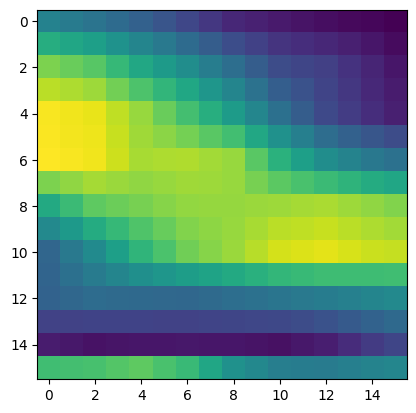

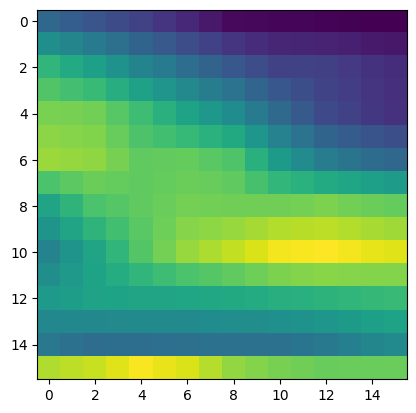

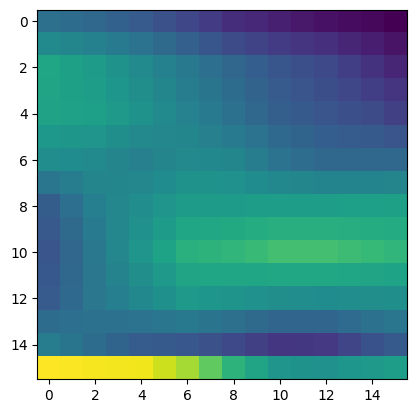

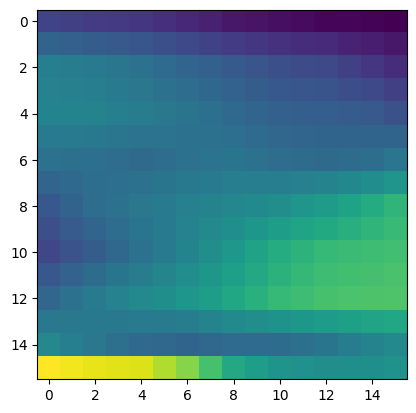

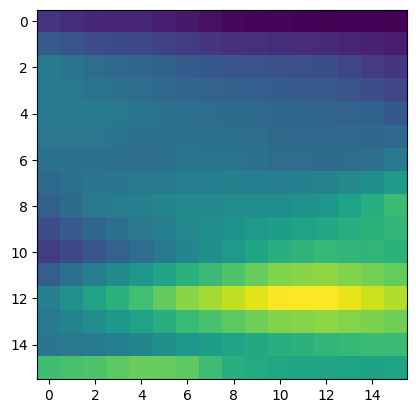

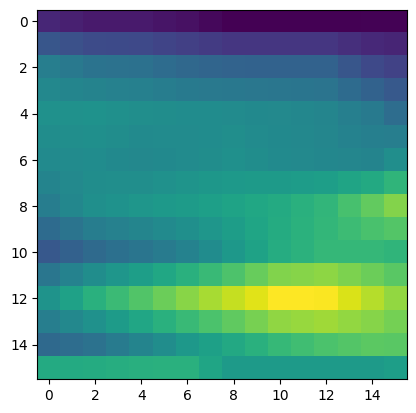

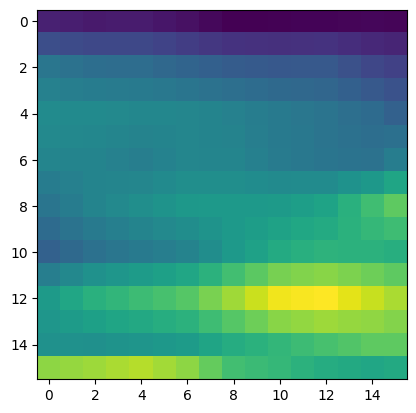

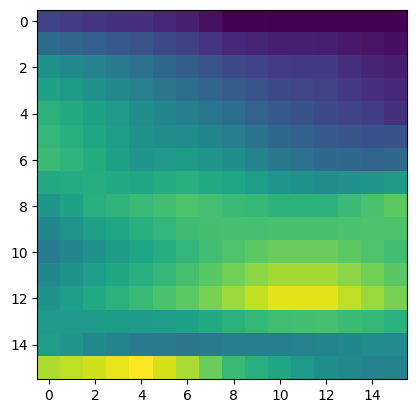

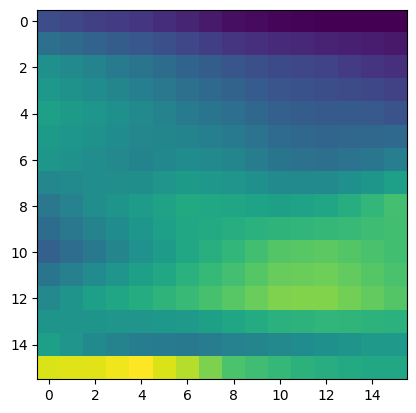

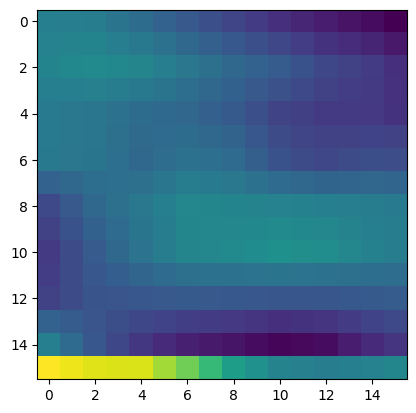

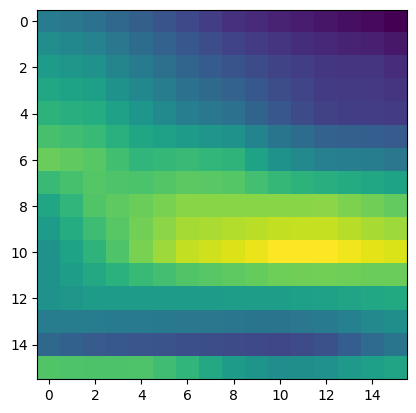

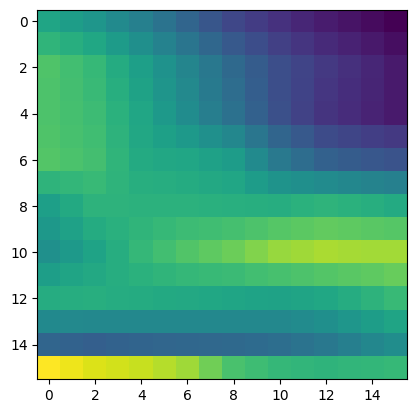

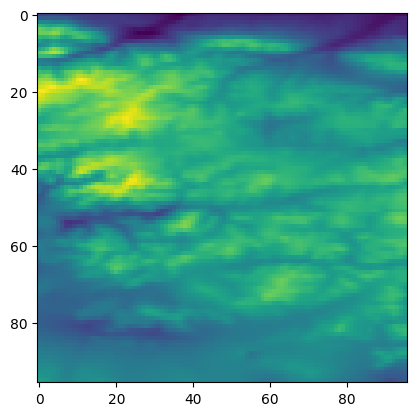

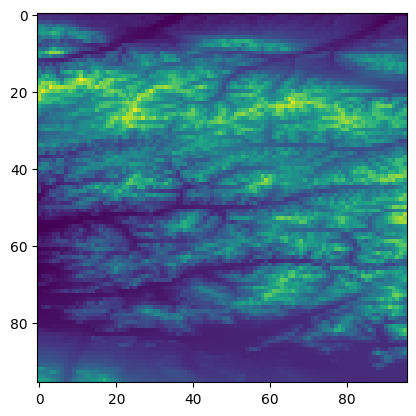

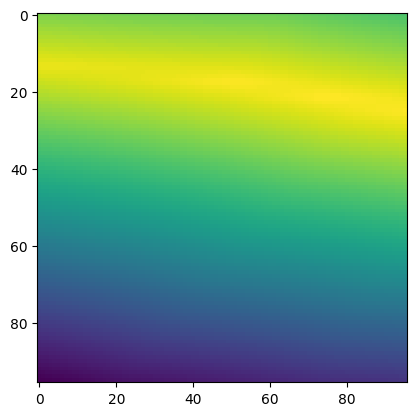

In [329]:
## ------------- MAKE TILES ------------ ##
def tile_data(tensor, tile_size, offset):
  h, w = tensor.size(1), tensor.size(2)
  res_ls = []
  for y in range(int(math.ceil(h/offset))):
    for x in range(int(math.ceil(w/offset))):
      curr = tensor[:, offset*y:min(offset*y+tile_size, h), offset*x:min(offset*x+tile_size, w)]
      if(y == 0):
        res_ls.append([curr])
      else:
        res_ls[x].append(curr)
  res_pad = [[torch.nn.functional.pad(ten, (0,tile_size-ten.shape[2],0,tile_size - ten.shape[1],0,0), mode = "constant", value = 0) for ten in x] for x in res_ls]
  return(res_pad)

scale_factor = 6
tile_size = 96
offset = 36

## PRISM
prism_tiles = tile_data(prism_stand.unsqueeze(0), tile_size, offset)

## ERA5
seqs = []
for i in range(12):
  seq = [i] + [x for x in range(12) if x != i]
  seqs.append(seq)

era5_tiles = tile_data(standardized_era5[seqs[0],...], int(tile_size / scale_factor), int(offset / scale_factor))

for i in range(12):
  plt.close()
  plt.imshow(era5_tiles[4][8][i,...])
  plt.show()

plt.close()
plt.imshow(prism_tiles[4][8][0,...])
plt.show()

## DEM & ocean proximity
hrcov = torch.cat([standardized_dem.unsqueeze(0), standardized_op.unsqueeze(0)], dim = 0)

hrcov_tiles = tile_data(hrcov, tile_size, offset)

plt.close()
plt.imshow(hrcov_tiles[4][8][0,...])
plt.show()

plt.close()
plt.imshow(hrcov_tiles[4][8][1,...])
plt.show()

In [336]:
G = torch.jit.load("/sapho/tirion/GANs/generators/prec/foundational_model/model4/jan/spec1/Generator_40.pt", map_location=torch.device('cuda:1'))
device = "cuda:1"
batchsize = 12

era5_tiles_gen = [[ten.unsqueeze(0) for ten in x] for x in era5_tiles]
dem_tiles_gen = [[ten.unsqueeze(0) for ten in x] for x in hrcov_tiles]
print(era5_tiles_gen[0][0].shape)
print(dem_tiles_gen[0][0].shape)
print(len(era5_tiles_gen))
print(len(era5_tiles_gen[0]))

preds = [[G(era5.to(device).float(),dem.to(device).float()).cpu().detach() for era5, dem in zip(e1,d1)] for e1,d1 in zip(era5_tiles_gen, dem_tiles_gen)]

torch.Size([1, 12, 16, 16])
torch.Size([1, 2, 96, 96])
61
34


torch.Size([1, 1, 96, 96])
34
61
61
34
torch.Size([66, 66])
torch.Size([1284, 66])


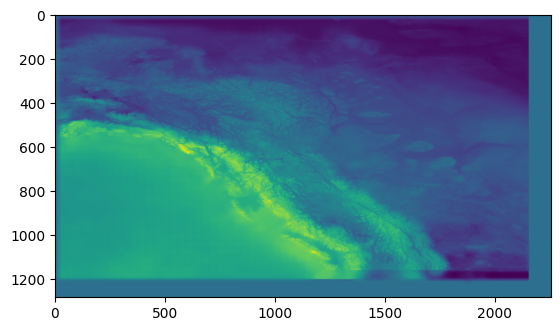

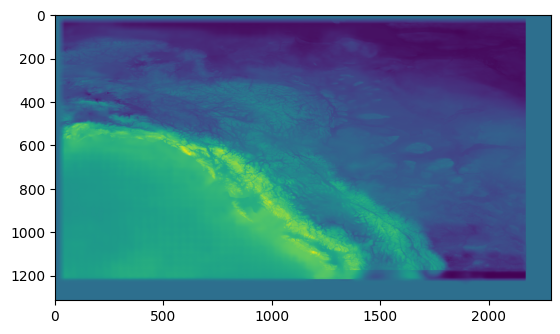

In [337]:
from torch.nn import functional as nnf

print(preds[0][0].shape)
ncol = len(preds)
nrow = len(preds[0])
print(nrow)
print(ncol)
scale_factor = 12
tile_size = 96
offset = 36
pad_size = int((tile_size-offset)/4)
overlap_size = pad_size * 2
new_size = tile_size - overlap_size

# crop edges
pred_crop = [[ten[0,0,pad_size:-pad_size,pad_size:-pad_size] for j,ten in enumerate(x)] for i,x in enumerate(preds)]
print(len(pred_crop))
print(len(pred_crop[0]))
print(pred_crop[0][0].shape)

# make masks
t1 = torch.linspace(0,1,overlap_size).repeat(new_size,1)
t2 = torch.ones((new_size,new_size-(overlap_size*2))) 
t3 = torch.linspace(1,0,overlap_size).repeat(new_size,1)
tile_mask = torch.cat([t1,t2,t3], dim = 1).transpose(0,1)

def blend_row(row_ls):
  temp = torch.cat([x.reshape(1,new_size**2,1) for x in row_ls],dim = 2)
  out = nnf.fold(temp, (nrow*offset + overlap_size*2,new_size), kernel_size=(new_size,new_size), stride=offset).squeeze()
  return out

## mask individual tiles
mask_tiles = [[ten * tile_mask for ten in x] for x in pred_crop]
pred_cols = [blend_row(x) for x in mask_tiles]
print(pred_cols[0].shape)

## make column mask
col_dims = pred_cols[0].shape
t1 = torch.linspace(0,1,overlap_size).repeat(col_dims[0],1)
t2 = torch.ones((col_dims[0],new_size-(overlap_size*2))) 
t3 = torch.linspace(1,0,overlap_size).repeat(col_dims[0],1)
column_mask = torch.cat([t1,t2,t3], dim = 1)

mask_cols = [column_mask * x for x in pred_cols]

## blend and concatenate cols
temp = [x.reshape(1,col_dims[0]*col_dims[1],1) for x in mask_cols]
uf = torch.cat(temp, dim = 2)
raw = nnf.fold(uf, (col_dims[0],ncol*offset + overlap_size*2), kernel_size=col_dims, stride=offset)
result = raw.squeeze()

plt.close()
plt.imshow(result)
plt.show()

final_pad = nnf.pad(result, (pad_size,pad_size,pad_size,pad_size), mode = "constant", value = 0)

plt.close()
plt.imshow(final_pad)
plt.show()

torch.save(final_pad, "/sapho/tirion/GANs/results/prec/foundational_model/model4/jan/spec1/" + "jan_gen40_fullregion.pt")

## DEBIAS PREDICTING CODE

/tmp/ipykernel_1269228/2618332280.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_log = np.log1p(era5)
/tmp/ipykernel_1269228/2618332280.py:14: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  era5_stand_log = np.log1p(era5_stand)
/tmp/ipykernel_1269228/2618332280.py:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  prism_log = np.log1p(prism)


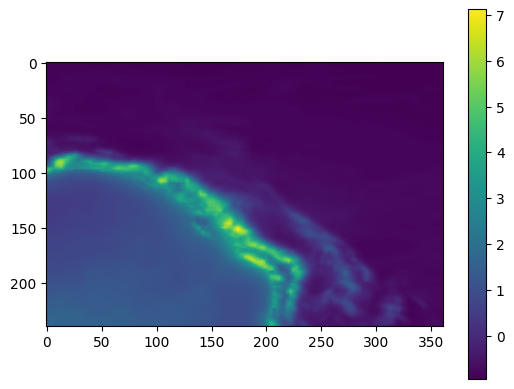

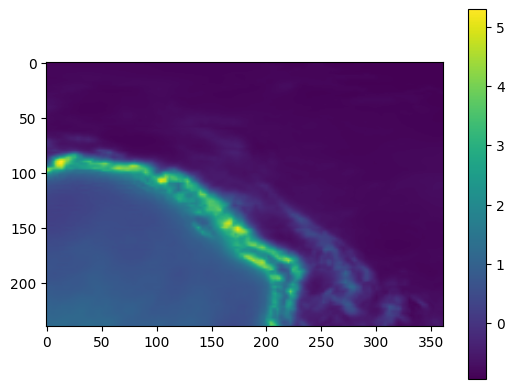

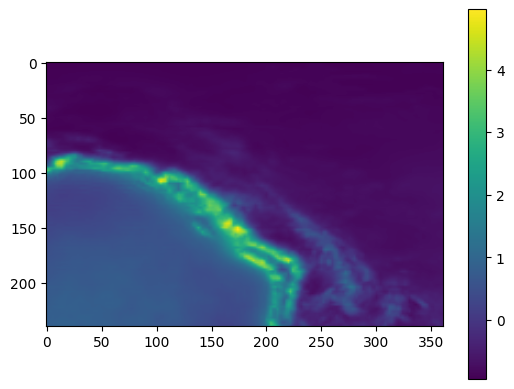

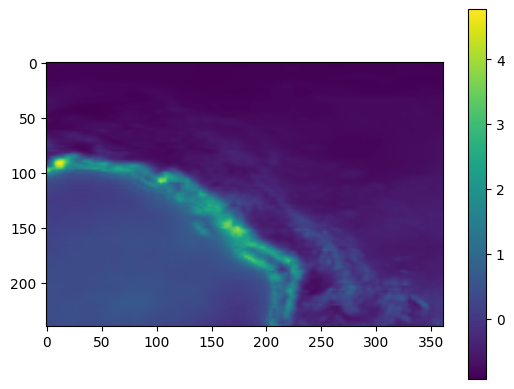

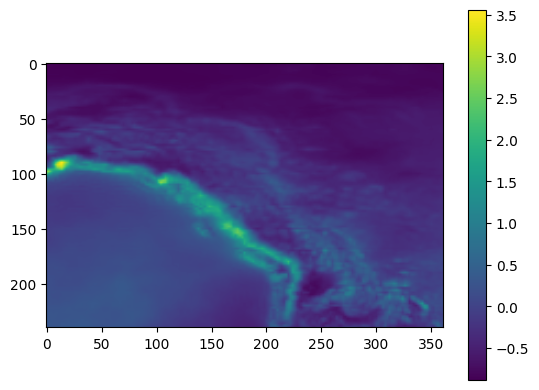

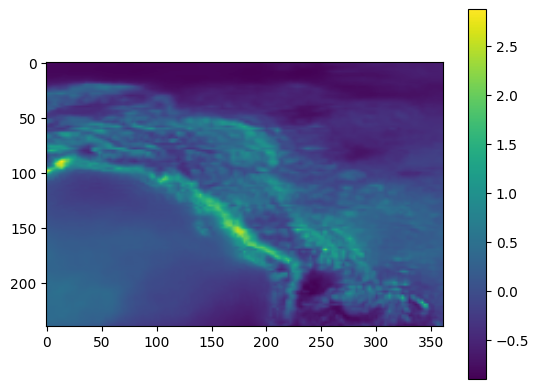

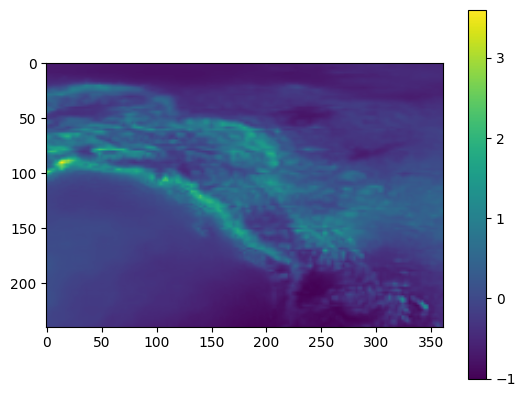

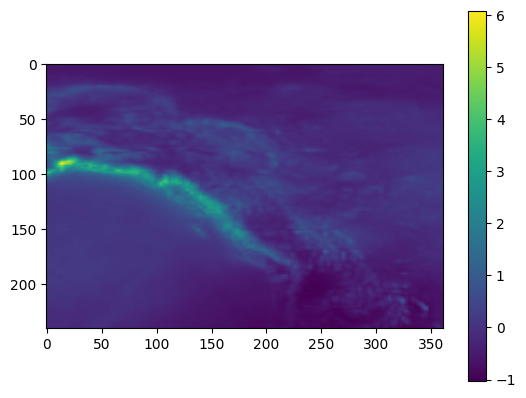

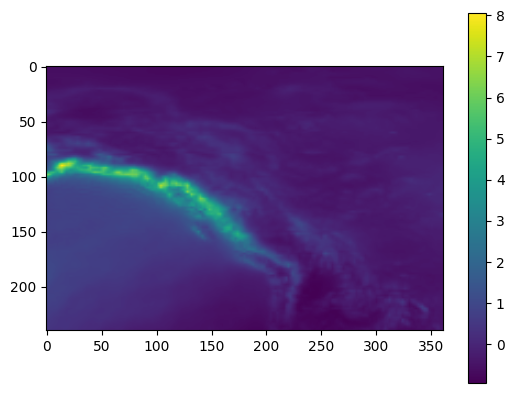

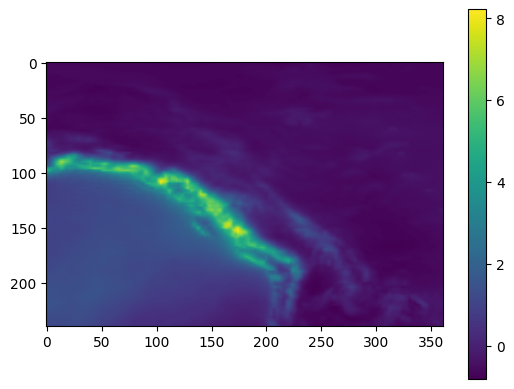

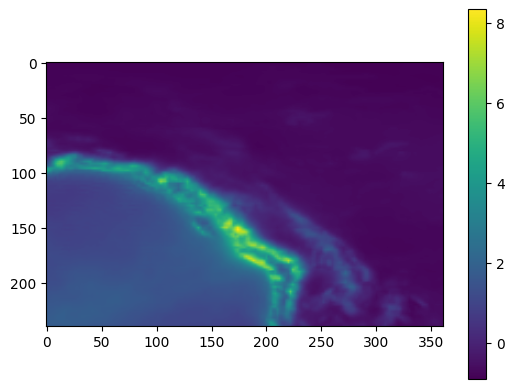

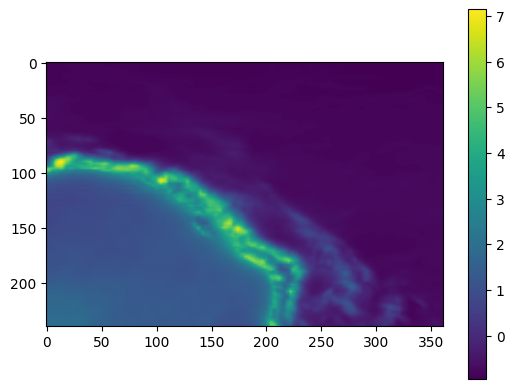

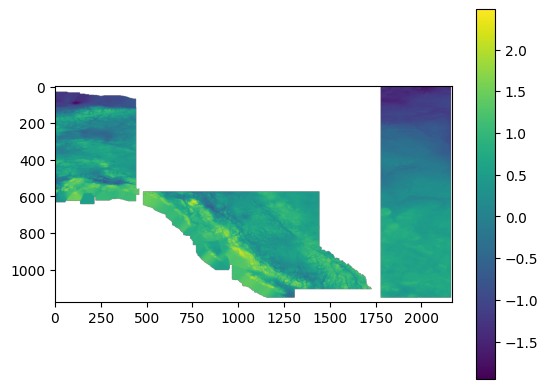

torch.Size([12, 240, 361])
torch.Size([1176, 2165])
torch.Size([1440, 2168])


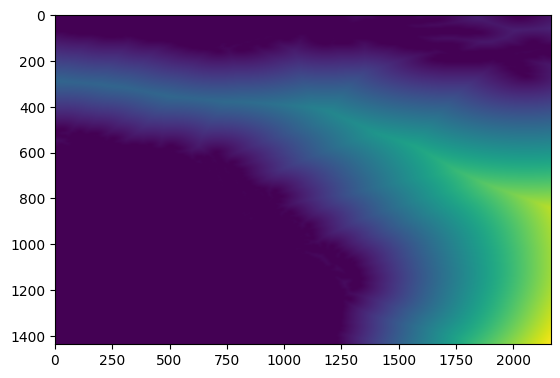

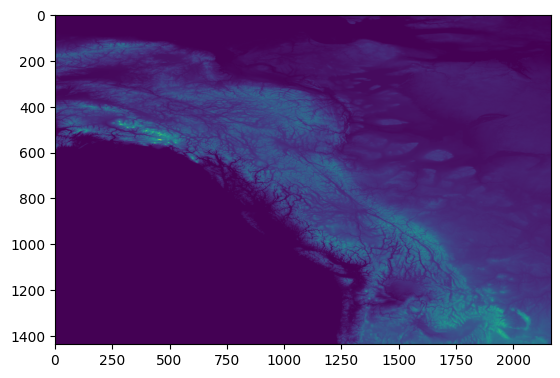

torch.Size([1437, 2165])
torch.Size([1, 1437, 2165])


In [2]:
## ------------- LOAD TRAINING DATA ------------ ##
# load in folders  
era5_folder = "/sapho/tirion/GANs/era5/prec/"
prism_folder = "/sapho/tirion/GANs/prism/prec/"
dem_folder = "/sapho/tirion/GANs/dem/"
stn_folder = "/sapho/tirion/climgan/data/stations/prec/"

## ERA5
era5_fields = xr.open_dataset(stn_folder + "era5_ppt_stn_train.nc")
era5 = torch.from_numpy(era5_fields.to_array().to_numpy())[0,...]
era5_log = np.log1p(era5)
era5_stand_fields = xr.open_dataset(era5_folder + "ppt_13_5_full.nc")
era5_stand = torch.from_numpy(era5_stand_fields.to_array().to_numpy())[0,...]
era5_stand_log = np.log1p(era5_stand)

# standardize
mask = ~torch.isnan(era5_stand_log)
era5_mean = era5_stand_log[mask].mean()
era5_std = era5_stand_log[mask].std()
standardized_era5 = (era5_log - era5_mean) / era5_std

## PRISM
month = "jun"

# standardization
stand = pd.read_csv(prism_folder + "/standardization.csv")
prism_mean = stand["log_mean"][0]
prism_std = stand["log_sd"][0]

prism_fields = xr.open_dataset(prism_folder + month +"/prism_train_coarse_ext.nc")
prism = torch.from_numpy(prism_fields.to_array().to_numpy())[0,...]
prism_log = np.log1p(prism)
prism_stand = (prism_log - prism_mean) / prism_std

for i in range(12):
  plt.close()
  plt.imshow(standardized_era5[i]) # by month
  plt.colorbar()
  plt.show()

plt.close()
plt.imshow(prism_stand)
plt.colorbar()
plt.show()

print(standardized_era5.shape)
print(prism_stand.shape)

## ocean proximity
op_fields = xr.open_dataset(stn_folder + "op_stn_train.nc")
op = torch.from_numpy(op_fields.to_array().to_numpy())[0,...]
op_stand_fields = xr.open_dataset(dem_folder + "ocean_proximity_full.nc")
op_stand = torch.from_numpy(op_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(op_stand)
op_mean = op_stand[mask].mean()
op_std = op_stand[mask].std()
standardized_op = (op - op_mean) / op_std
print(standardized_op.shape)
standardized_op = standardized_op[:1437,:2165]

plt.close()
plt.imshow(standardized_op)
plt.show()

## DEM
dem_fields = xr.open_dataset(stn_folder + "dem_stn_train.tif")
dem = torch.from_numpy(dem_fields.to_array().to_numpy())[0,...]
dem_stand_fields = xr.open_dataset(dem_folder + "dem_full.nc")
dem_stand = torch.from_numpy(dem_stand_fields.to_array().to_numpy())[0,...]

# standardize
mask = ~torch.isnan(dem_stand)
dem_mean = dem_stand[mask].mean()
dem_std = dem_stand[mask].std()
standardized_dem = (dem - dem_mean) / dem_std

plt.close()
plt.imshow(standardized_dem[0])
plt.show()

print(standardized_op.shape)
print(standardized_dem.shape)

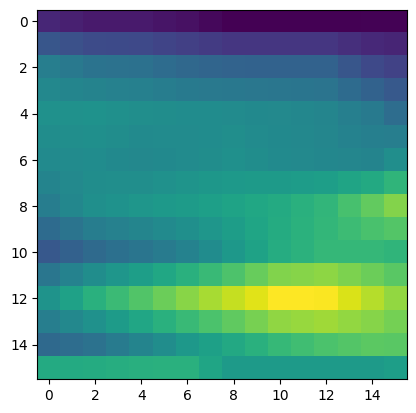

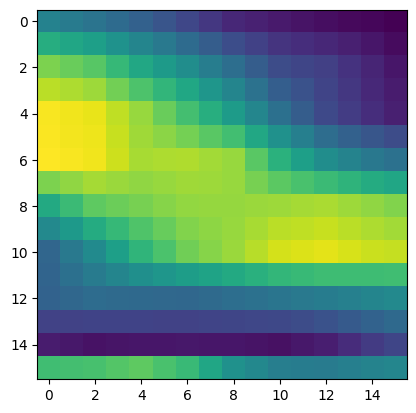

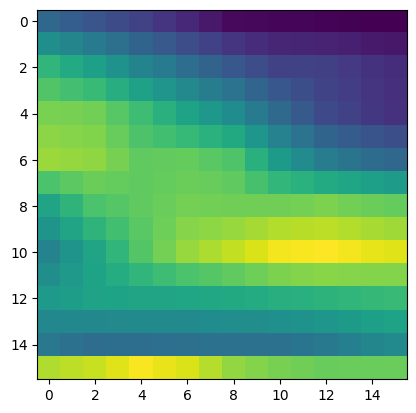

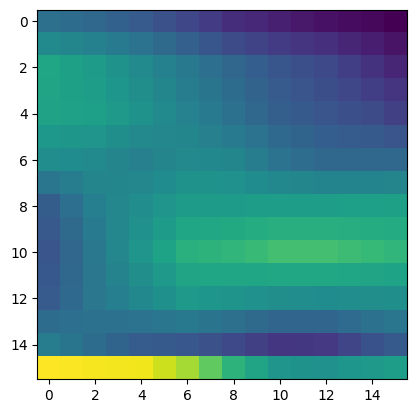

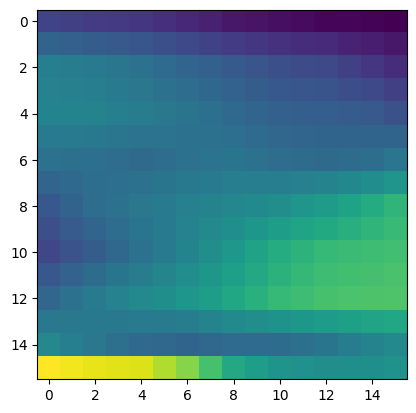

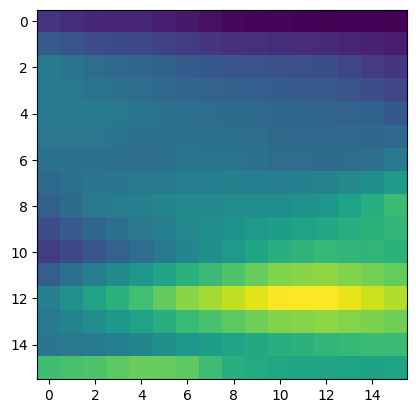

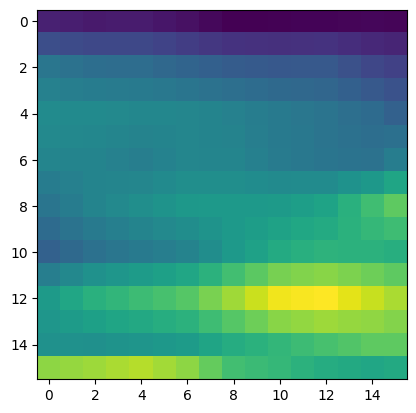

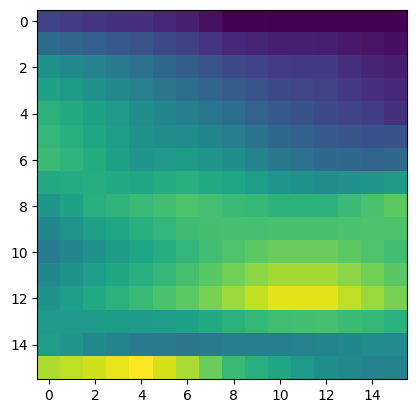

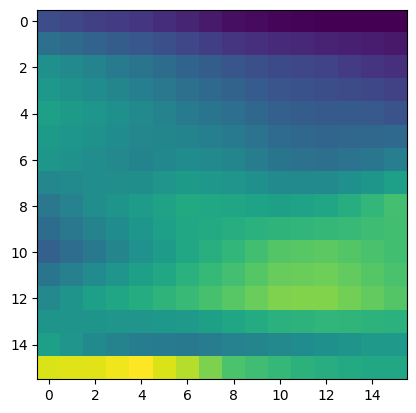

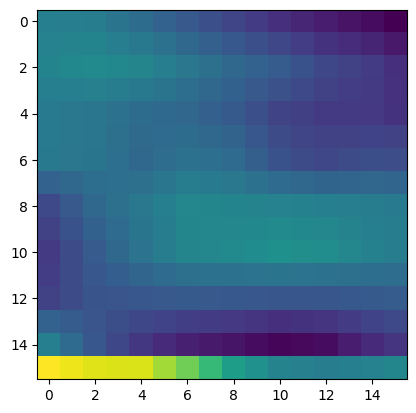

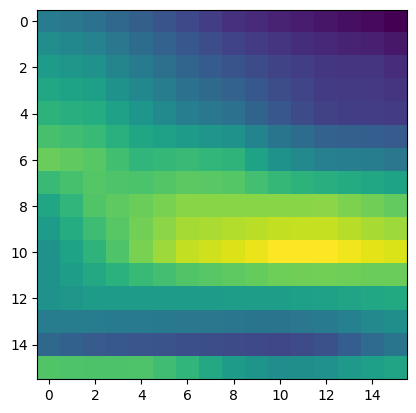

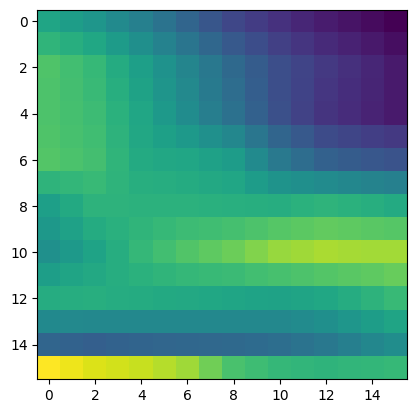

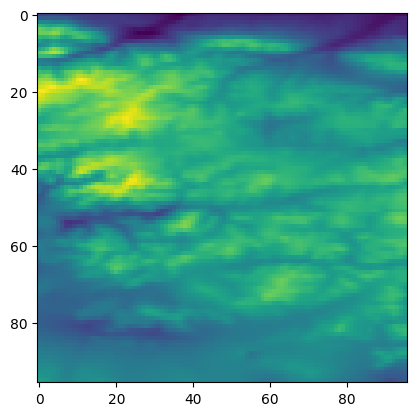

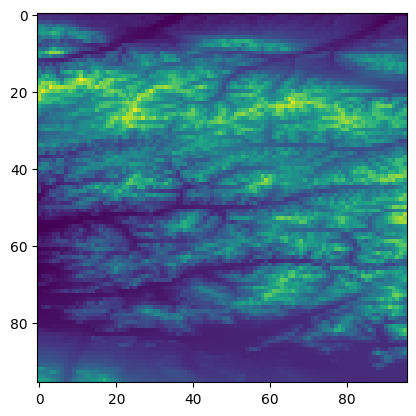

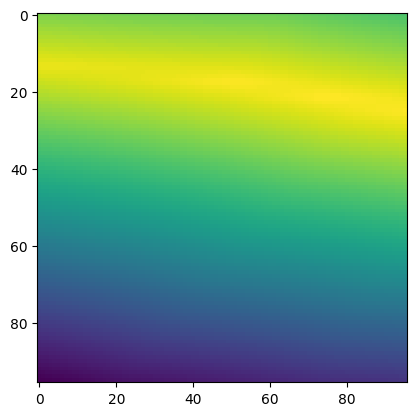

12
2


In [3]:
## ------------- MAKE TILES ------------ ##
def tile_data(tensor, tile_size, offset):
  h, w = tensor.size(1), tensor.size(2)
  res_ls = []
  for y in range(int(math.ceil(h/offset))):
    for x in range(int(math.ceil(w/offset))):
      curr = tensor[:, offset*y:min(offset*y+tile_size, h), offset*x:min(offset*x+tile_size, w)]
      if(y == 0):
        res_ls.append([curr])
      else:
        res_ls[x].append(curr)
  res_pad = [[torch.nn.functional.pad(ten, (0,tile_size-ten.shape[2],0,tile_size - ten.shape[1],0,0), mode = "constant", value = 0) for ten in x] for x in res_ls]
  return(res_pad)

scale_factor = 6
tile_size = 96
offset = 36

## PRISM
prism_tiles = tile_data(prism_stand.unsqueeze(0), tile_size, offset)

## ERA5
seqs = []
for i in range(12):
  seq = [i] + [x for x in range(12) if x != i]
  seqs.append(seq)

era5_tiles = tile_data(standardized_era5[seqs[5],...], int(tile_size / scale_factor), int(offset / scale_factor))

for i in range(12):
  plt.close()
  plt.imshow(era5_tiles[4][8][i,...])
  plt.show()

plt.close()
plt.imshow(prism_tiles[4][8][0,...])
plt.show()

## DEM & ocean proximity
hrcov = torch.cat([standardized_dem, standardized_op.unsqueeze(0)], dim = 0)

hrcov_tiles = tile_data(hrcov, tile_size, offset)

plt.close()
plt.imshow(hrcov_tiles[4][8][0,...])
plt.show()

plt.close()
plt.imshow(hrcov_tiles[4][8][1,...])
plt.show()

print(len(era5_tiles[0][0]))
print(len(hrcov_tiles[0][0]))

In [4]:
G = torch.jit.load("/sapho/tirion/GANs/generators/prec/foundational_model/model4/jun/spec1/debias/Generator_4_Debias_Dec1.pt", map_location=torch.device('cuda:1'))
device = "cuda:1"
batchsize = 12

era5_tiles_gen = [[ten.unsqueeze(0) for ten in x] for x in era5_tiles]
dem_tiles_gen = [[ten.unsqueeze(0) for ten in x] for x in hrcov_tiles]
print(era5_tiles_gen[0][0].shape)
print(dem_tiles_gen[0][0].shape)
print(len(era5_tiles_gen))
print(len(era5_tiles_gen[0]))

preds = [[G(era5.to(device).float(),dem.to(device).float()).cpu().detach() for era5, dem in zip(e1,d1)] for e1,d1 in zip(era5_tiles_gen, dem_tiles_gen)]

torch.Size([1, 12, 16, 16])
torch.Size([1, 2, 96, 96])
61
40


torch.Size([1, 1, 96, 96])
40
61
61
40
torch.Size([66, 66])
torch.Size([1500, 66])


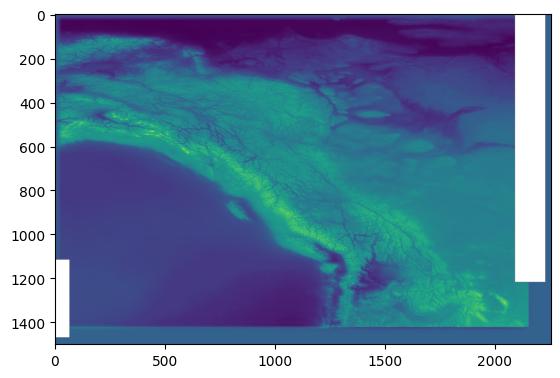

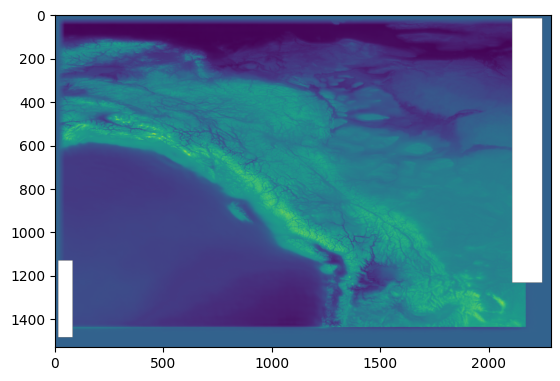

In [5]:
from torch.nn import functional as nnf

print(preds[0][0].shape)
ncol = len(preds)
nrow = len(preds[0])
print(nrow)
print(ncol)
scale_factor = 12
tile_size = 96
offset = 36
pad_size = int((tile_size-offset)/4)
overlap_size = pad_size * 2
new_size = tile_size - overlap_size

# crop edges
pred_crop = [[ten[0,0,pad_size:-pad_size,pad_size:-pad_size] for j,ten in enumerate(x)] for i,x in enumerate(preds)]
print(len(pred_crop))
print(len(pred_crop[0]))
print(pred_crop[0][0].shape)

# make masks
t1 = torch.linspace(0,1,overlap_size).repeat(new_size,1)
t2 = torch.ones((new_size,new_size-(overlap_size*2))) 
t3 = torch.linspace(1,0,overlap_size).repeat(new_size,1)
tile_mask = torch.cat([t1,t2,t3], dim = 1).transpose(0,1)

def blend_row(row_ls):
  temp = torch.cat([x.reshape(1,new_size**2,1) for x in row_ls],dim = 2)
  out = nnf.fold(temp, (nrow*offset + overlap_size*2,new_size), kernel_size=(new_size,new_size), stride=offset).squeeze()
  return out

## mask individual tiles
mask_tiles = [[ten * tile_mask for ten in x] for x in pred_crop]
pred_cols = [blend_row(x) for x in mask_tiles]
print(pred_cols[0].shape)

## make column mask
col_dims = pred_cols[0].shape
t1 = torch.linspace(0,1,overlap_size).repeat(col_dims[0],1)
t2 = torch.ones((col_dims[0],new_size-(overlap_size*2))) 
t3 = torch.linspace(1,0,overlap_size).repeat(col_dims[0],1)
column_mask = torch.cat([t1,t2,t3], dim = 1)

mask_cols = [column_mask * x for x in pred_cols]

## blend and concatenate cols
temp = [x.reshape(1,col_dims[0]*col_dims[1],1) for x in mask_cols]
uf = torch.cat(temp, dim = 2)
raw = nnf.fold(uf, (col_dims[0],ncol*offset + overlap_size*2), kernel_size=col_dims, stride=offset)
result = raw.squeeze()

plt.close()
plt.imshow(result)
plt.show()

final_pad = nnf.pad(result, (pad_size,pad_size,pad_size,pad_size), mode = "constant", value = 0)

plt.close()
plt.imshow(final_pad)
plt.show()

torch.save(final_pad, "/sapho/tirion/GANs/results/prec/foundational_model/model4/jun/spec1/debias/" + "jun_debias_Dec1.pt")